In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix, roc_curve,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Problem 1: Linear Regression
-----------------------------
The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

##1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

**Reading the given compactiv.xlsx assigning it to df variable**

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/compactiv.xlsx")

**Checking the number of rows and columns of compactiv data frame**

In [ ]:
print("Loaded compactiv data frame has {0} rows and {1} columns".format(df.shape[0],df.shape[1]))

Loaded compactiv data frame has 8192 rows and 22 columns


In [ ]:
pd.set_option('display.max_columns',100) #Using set_option function from pandas to view all columns
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


**Check for data model**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

1. As seen above, copactiv data has almost all numeric columns except runqsz which is of object type.
2. Also we can see some null entries in columns rchar and wchar. We will dig through further on these columns to handle missing values.

**Checking for five point summary of all numeric columns**


In [ ]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,19.560,53.354,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,13.106,29.892,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2306.318,1633.617,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,210.480,198.980,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,150.058,160.479,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.885,2.479,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.792,5.212,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,197385.728,239837.494,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,95902.993,140841.708,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285,5.307,0.0,0.0,0.0,2.400,81.44


As per above summary,
1. values in each columns seems to be of different scales.
2. more than half of the attributes have values starting with 0.
3. there is considerable difference between mean and medain for almost all the attributes which indicates skewness in data.

**Lets look at correlation between all the above attributes to check if a particular attribute already describes any other attributes values.**

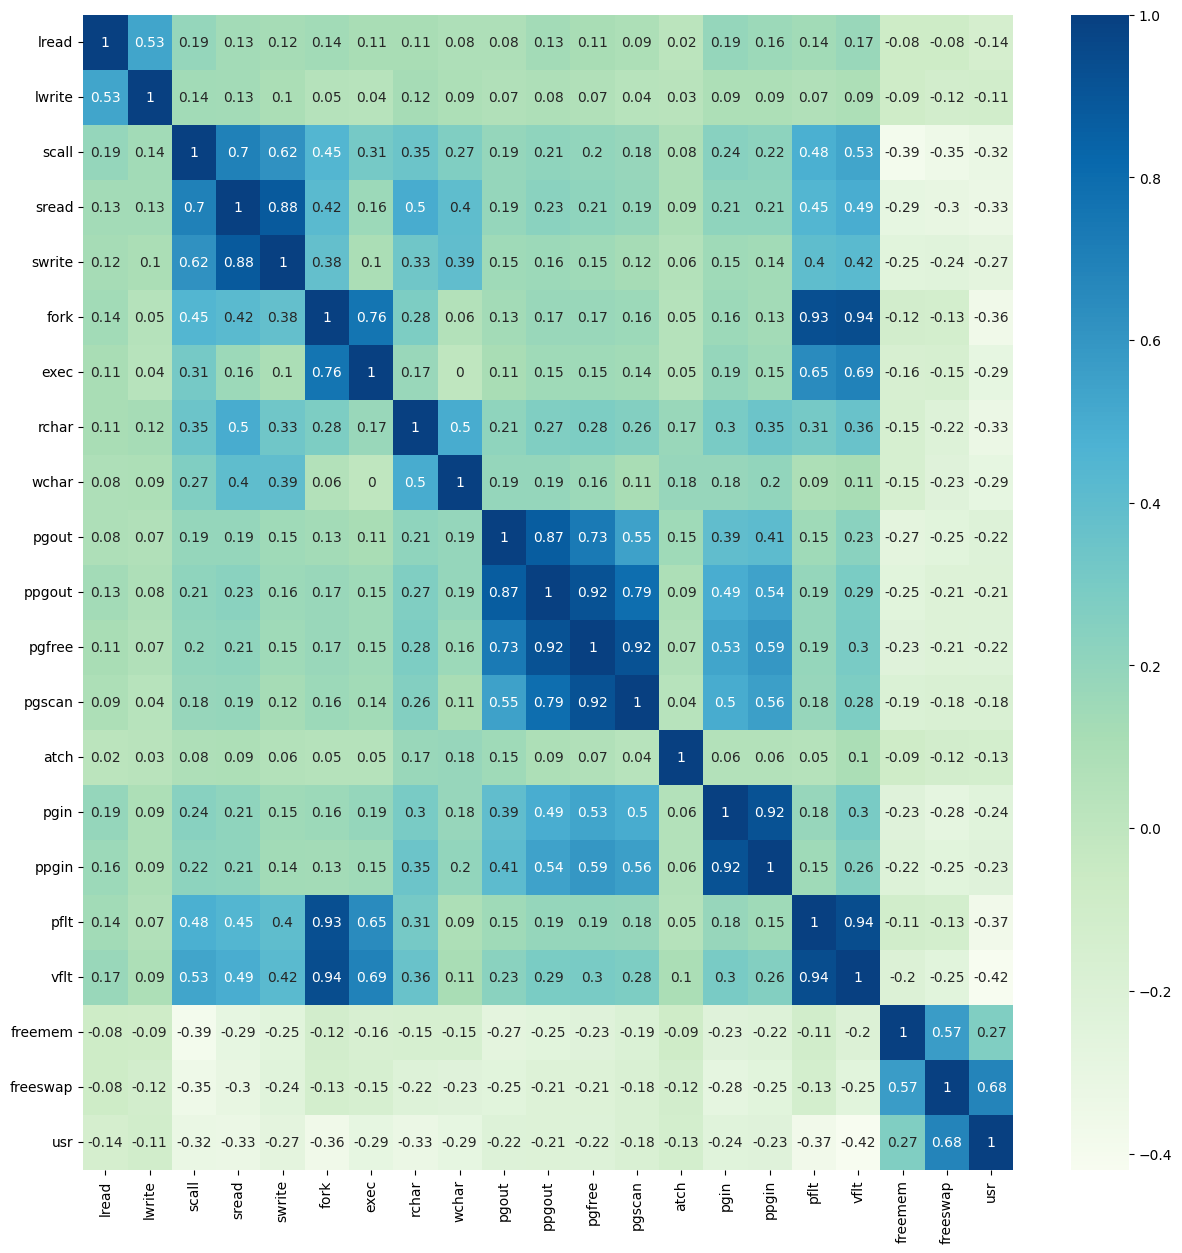

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(numeric_only=True).round(2),cbar=True,cmap='GnBu',annot=True);
plt.show()

1. There is high amount of positive correlation between fork-pfit, fork-vfit, vfit-pfit, pgin-ppgin, pgscan-pgfree, ppgout,pgfree, sread-swrite etc.,
2. There is high amount of negative correlation between usr-vfit,usr-pfit etc.,

**Univariate Analysis**

Univariate analysis for  lread



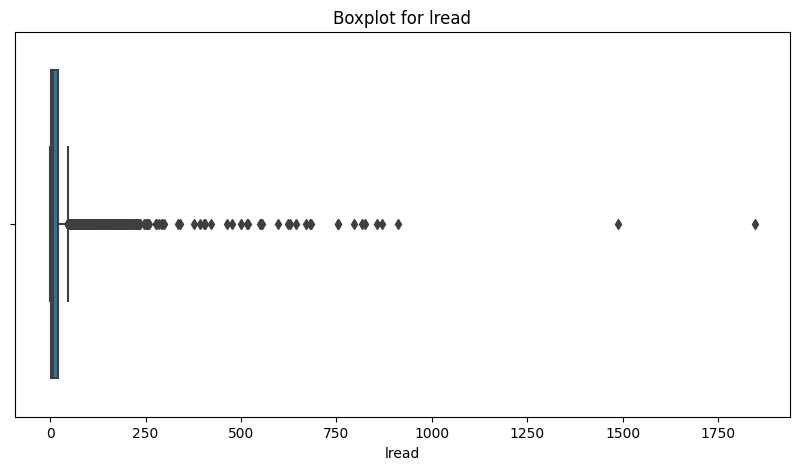

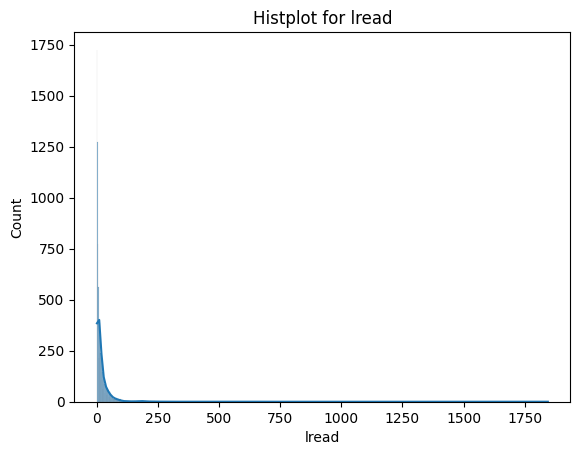



Univariate analysis for  lwrite



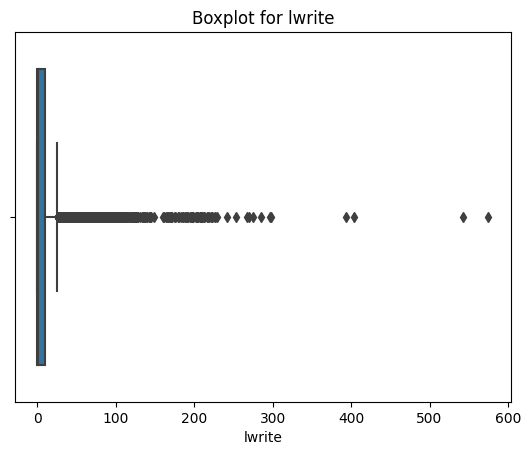

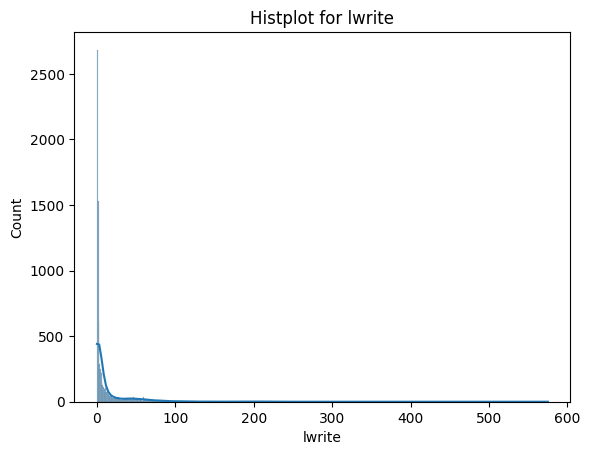



Univariate analysis for  scall



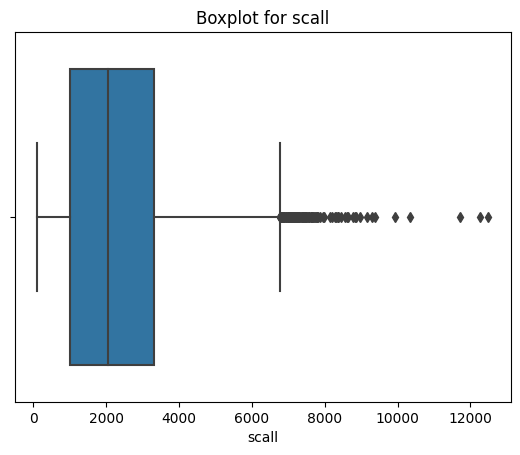

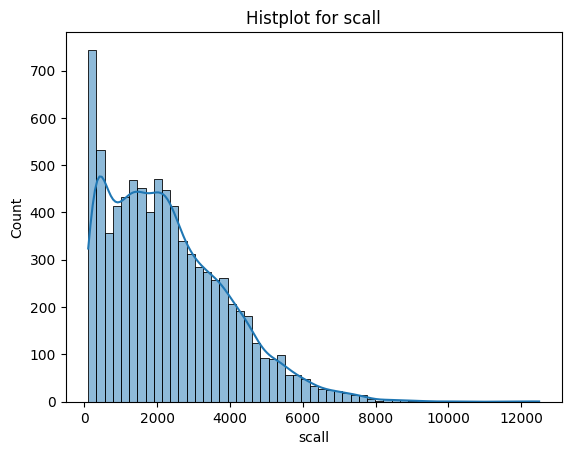



Univariate analysis for  sread



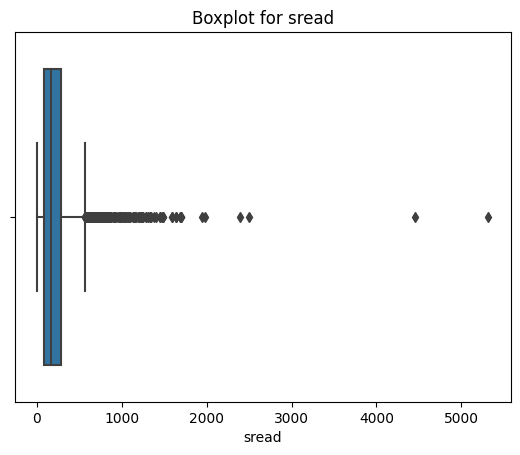

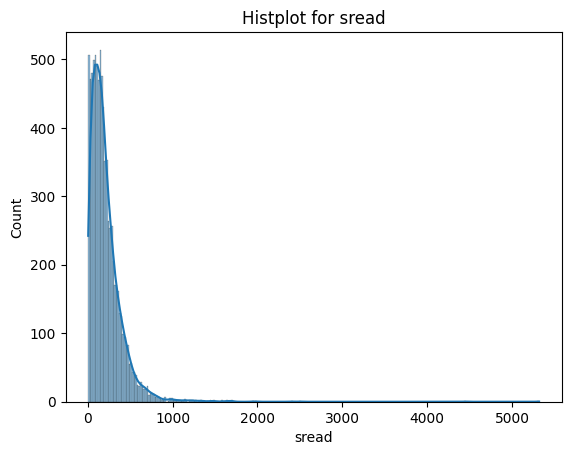



Univariate analysis for  swrite



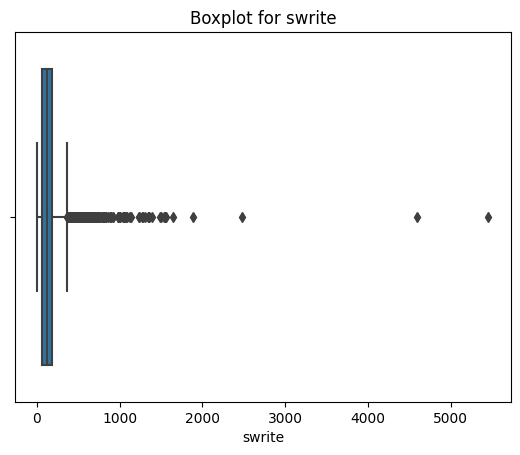

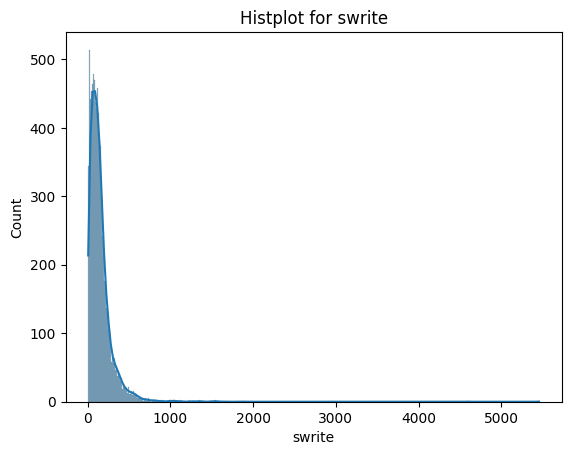



Univariate analysis for  fork



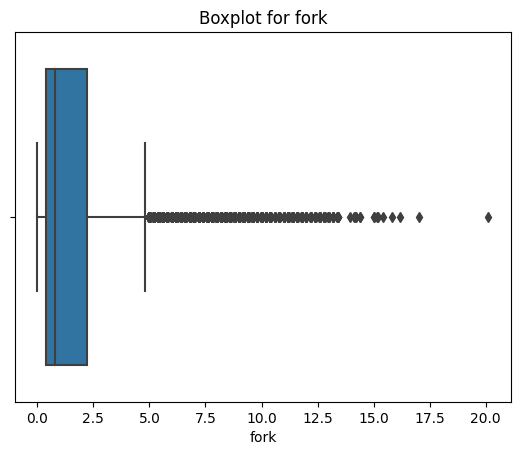

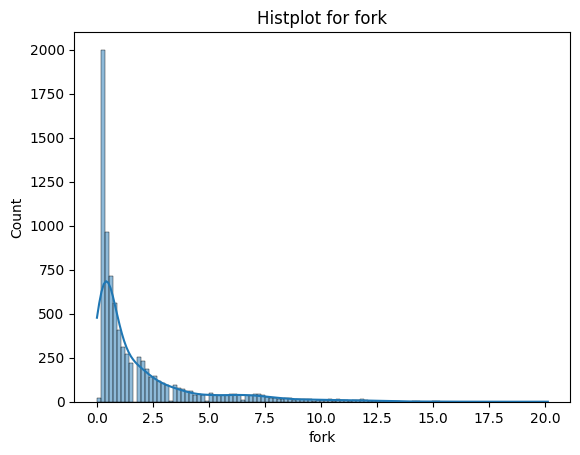



Univariate analysis for  exec



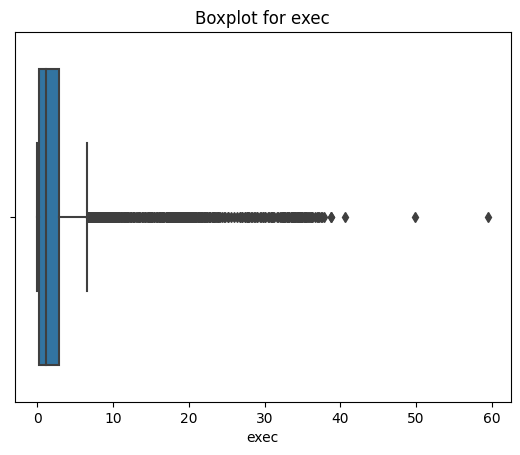

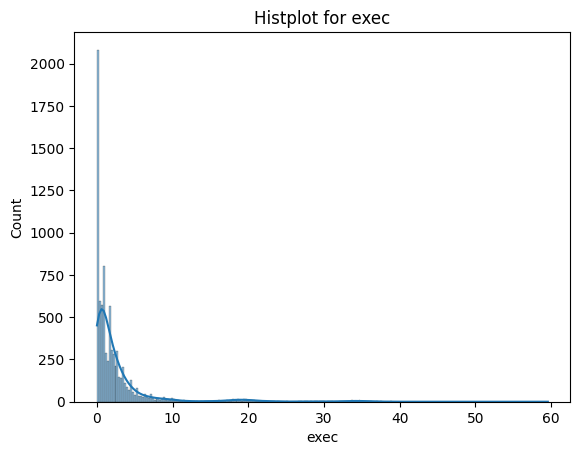



Univariate analysis for  rchar



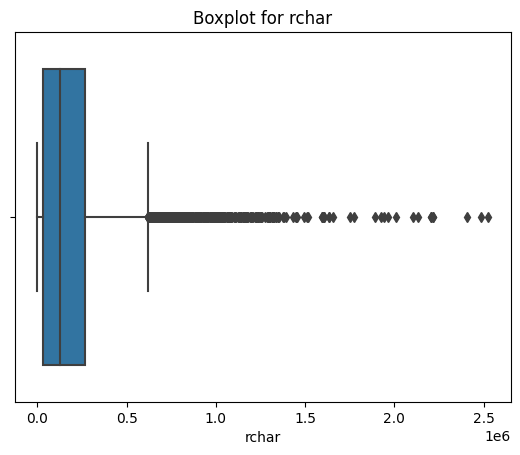

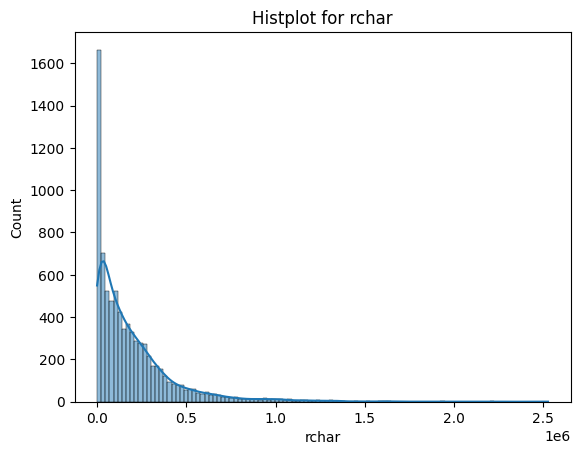



Univariate analysis for  wchar



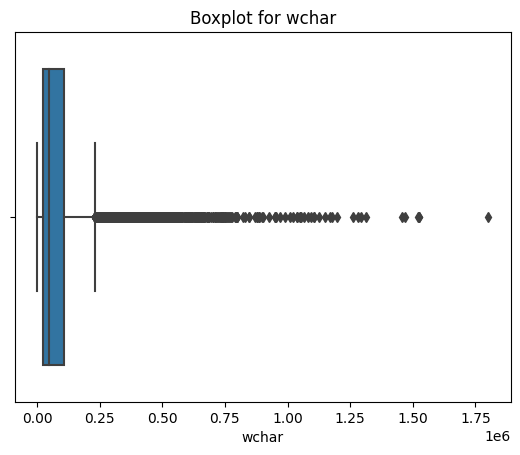

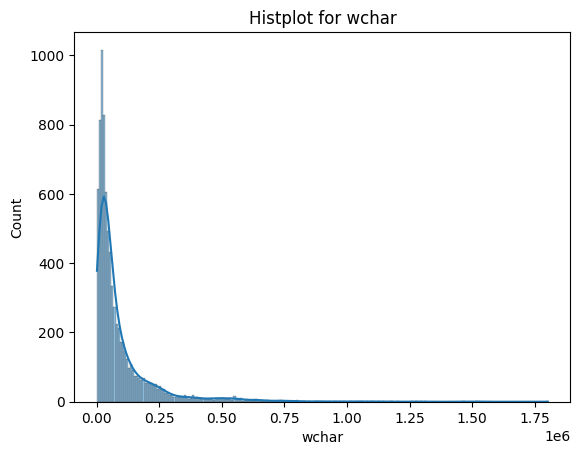



Univariate analysis for  pgout



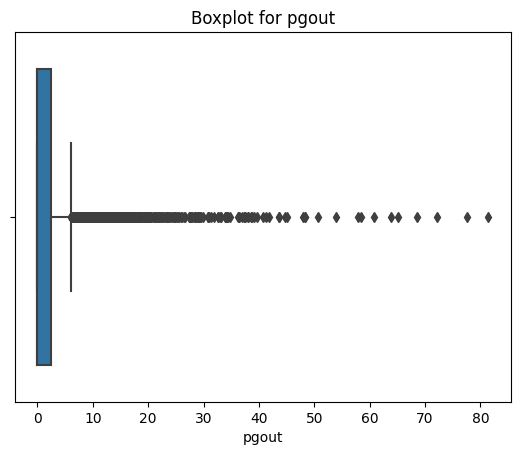

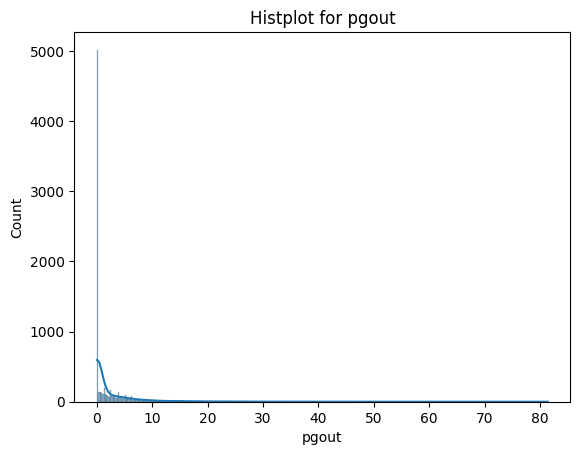



Univariate analysis for  ppgout



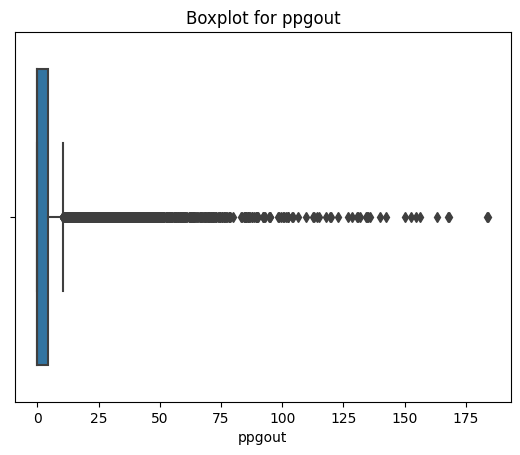

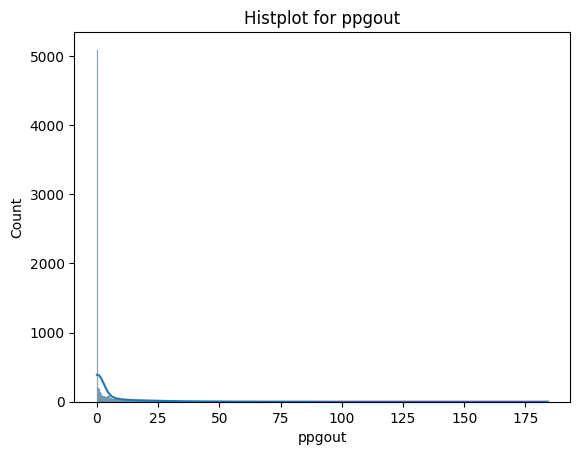



Univariate analysis for  pgfree



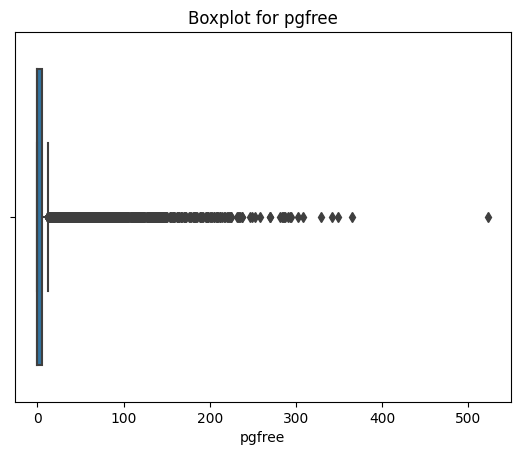

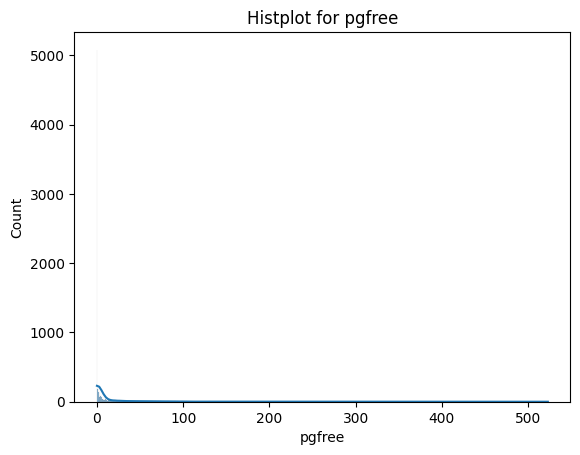



Univariate analysis for  pgscan



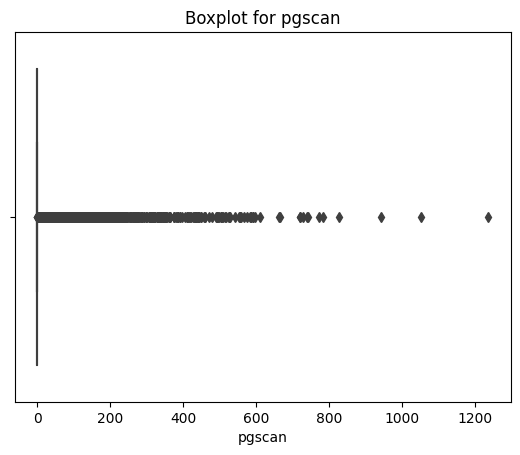

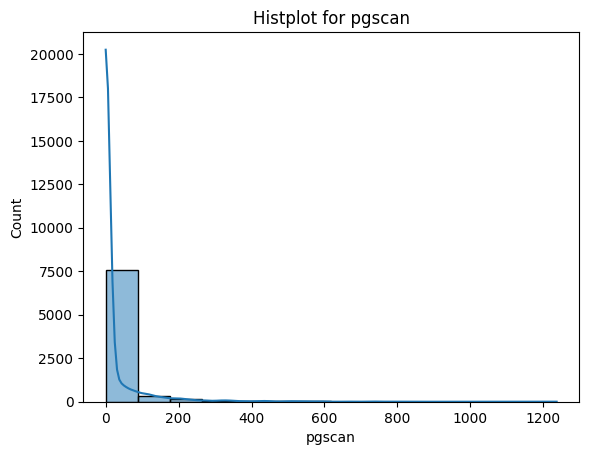



Univariate analysis for  atch



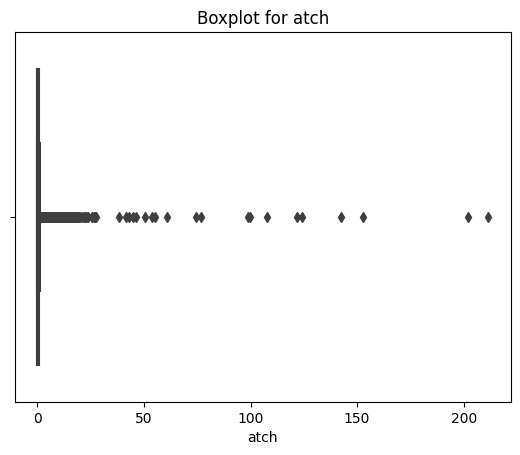

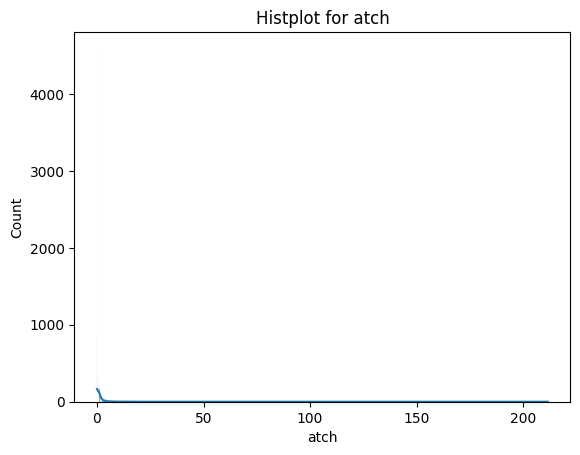



Univariate analysis for  pgin



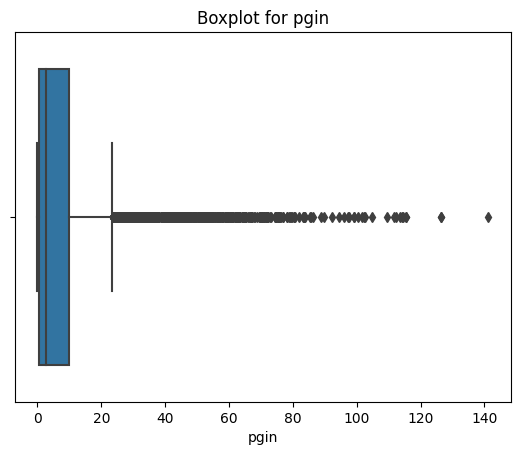

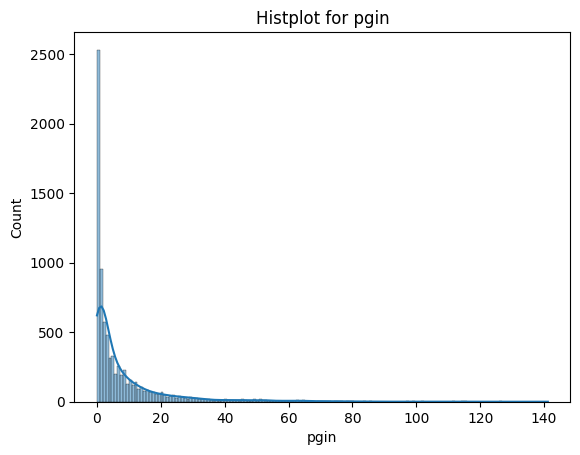



Univariate analysis for  ppgin



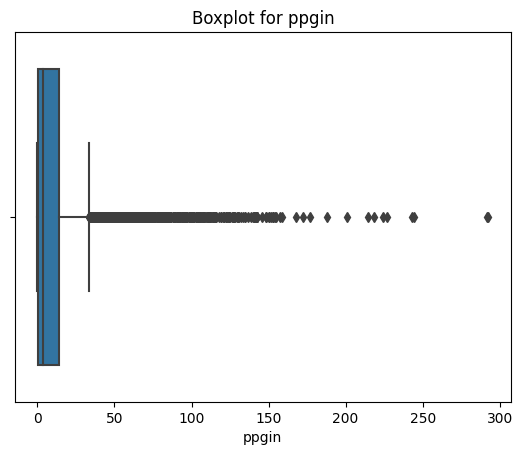

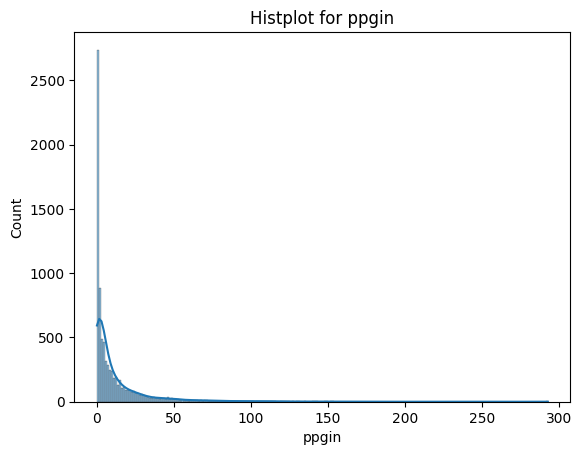



Univariate analysis for  pflt



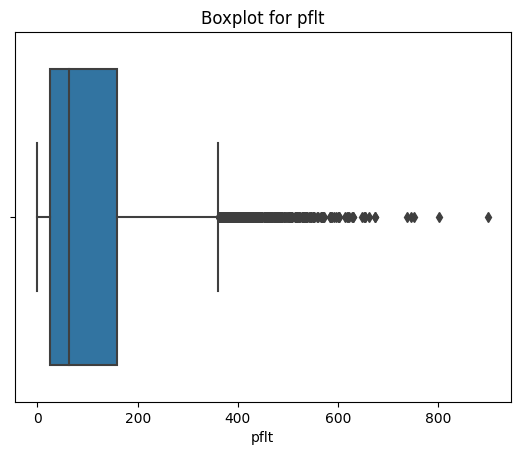

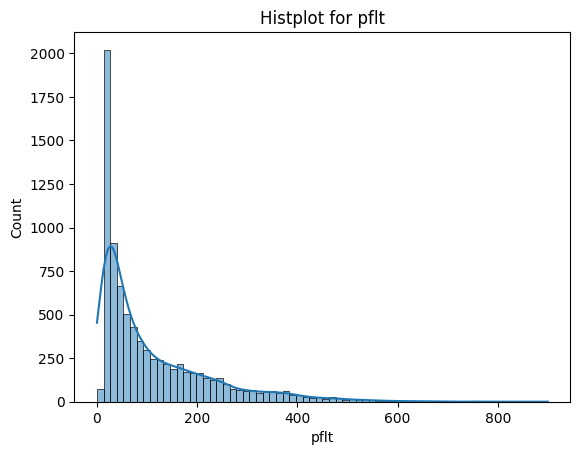



Univariate analysis for  vflt



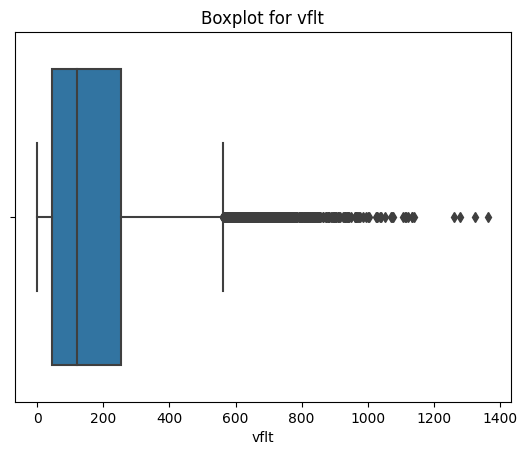

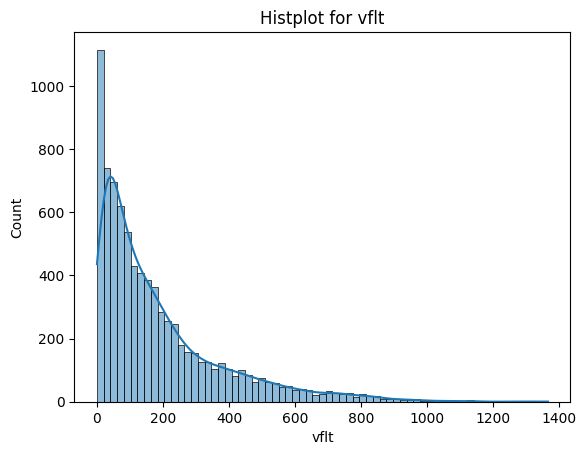



Univariate analysis for  freemem



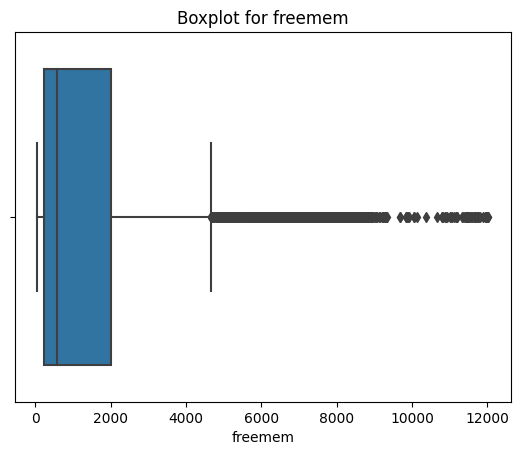

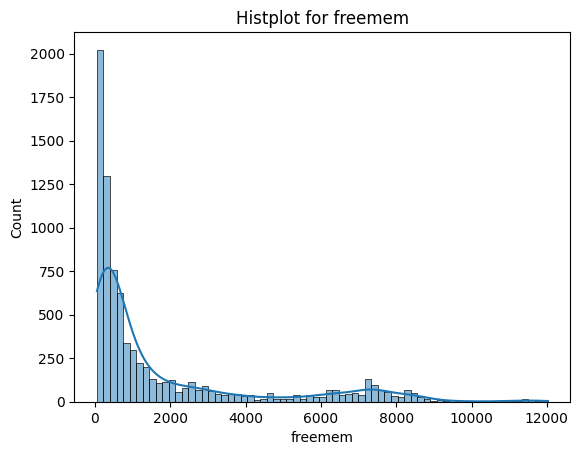



Univariate analysis for  freeswap



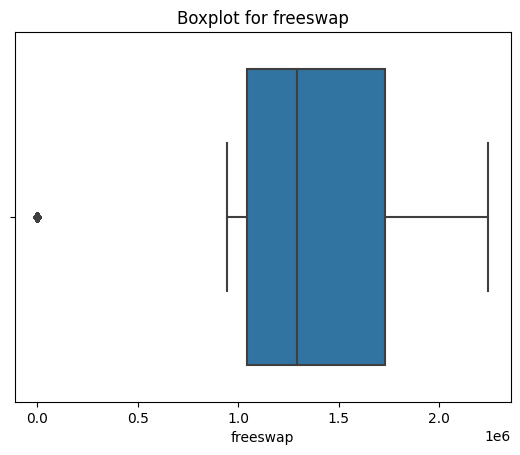

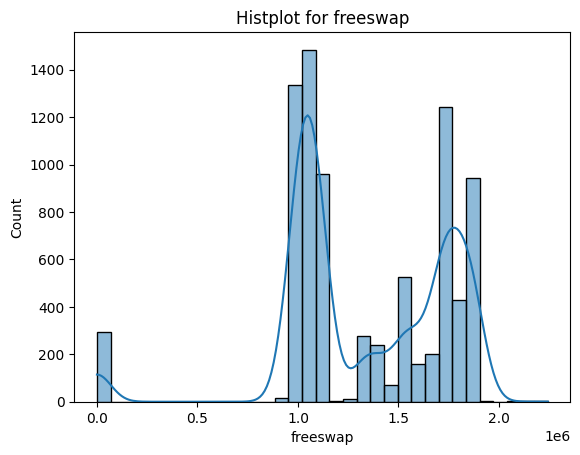



Univariate analysis for  usr



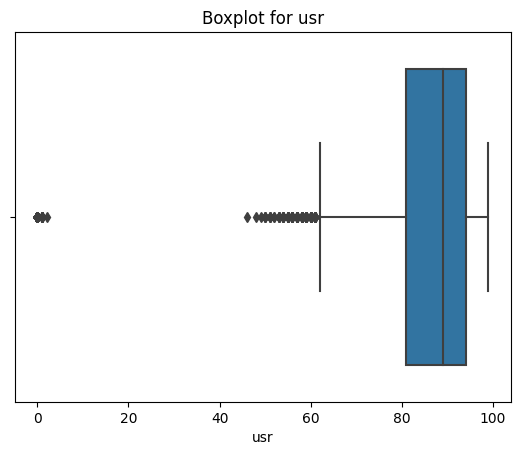

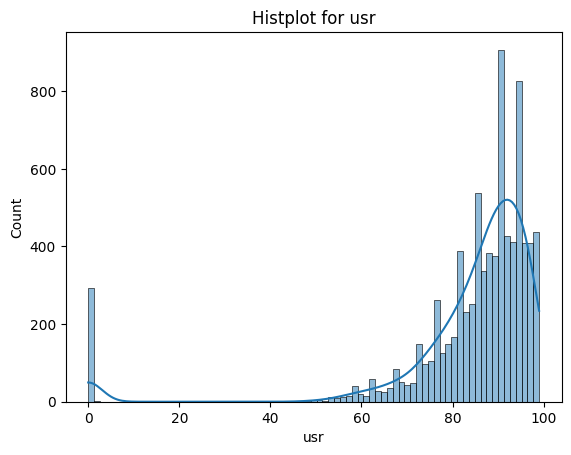

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns

plt.figure(figsize=(10,5))
for i in num_columns:
  print("Univariate analysis for ",i)
  print("")
  plt.title("Boxplot for "+i)
  sb.boxplot(x=df[i])
  plt.show()
  print("")
  plt.title("Histplot for "+i)
  sb.histplot(df[i],kde=True)
  plt.show()
  print("")
  print("")




In [ ]:
len(num_columns)

21

As per above graph its evident that most of the attributes are highly skewed.
Also distribution of data indicates that mode lies near lower numbers.

**Bivariate Analysis**

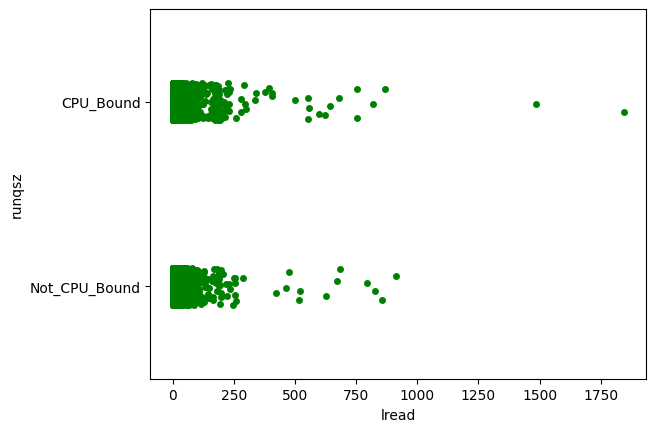

In [ ]:
sb.stripplot(data=df,x='lread',y='runqsz',color='green');

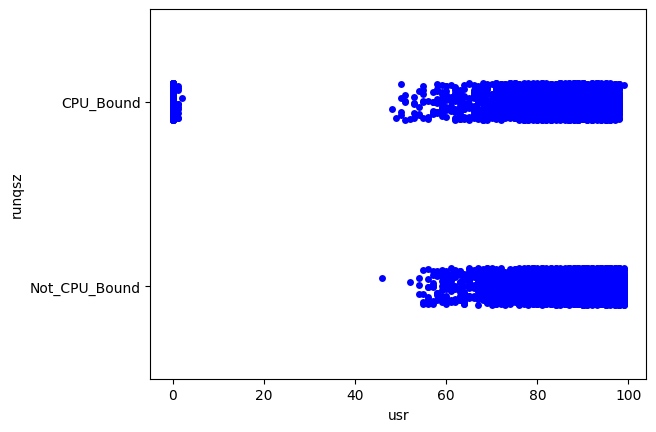

In [ ]:
sb.stripplot(data=df,x='usr',y='runqsz',color='blue');

For CPU_Bound there are more entries with 0 users

<Axes: xlabel='fork', ylabel='runqsz'>

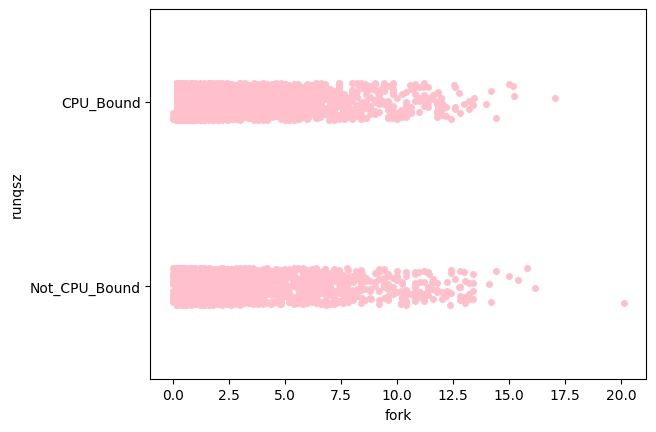

In [ ]:
sb.stripplot(data=df,x='fork',y='runqsz',color='pink')

**Multivariate Analysis**

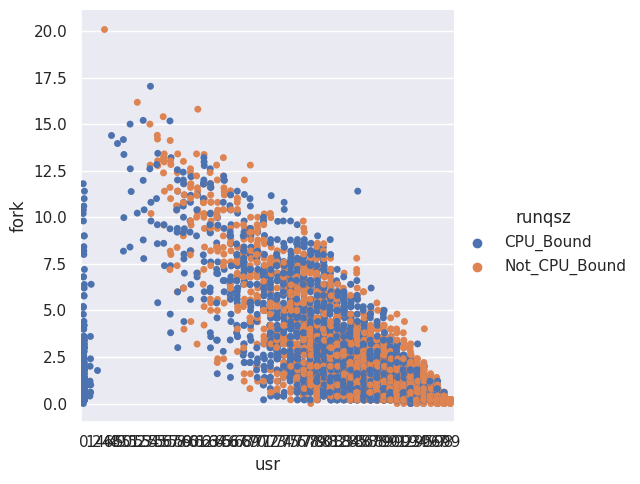

In [ ]:
sb.set(rc={"figure.figsize":(40, 4)})
sb.catplot(data=df,x='usr',y='fork',hue='runqsz');




fork and user are varying inversely due to their negative correlation.

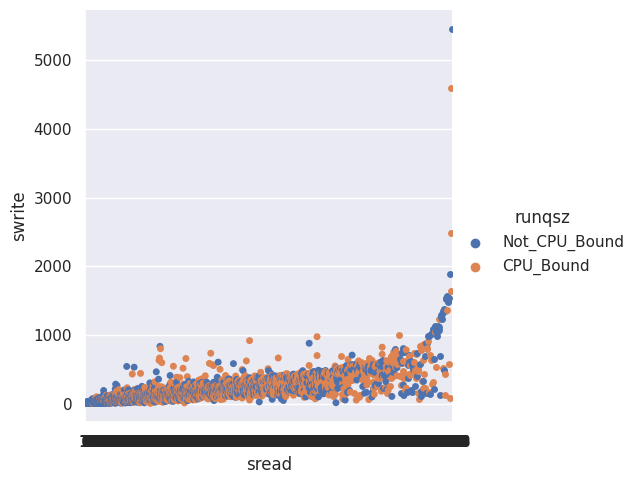

In [ ]:
#sb.set(rc={"figure.figsize":(40, 4)})
sb.catplot(data=df,x='sread',y='swrite',hue='runqsz',legend_out=False);


attributes sread and lread are almost evenly distributed and also varying in same direction due to high correlation.


Analysis of usr variable with all the features against runqsz

In [ ]:
for i in num_columns:
  sb.catplot(data=df,x='usr',y=i,hue='runqsz',legend_out=False);
  plt.xscale('linear')
  plt.xticks(rotation=90)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

##1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

Fetching the columns with null entries

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]/len(df)*100


rchar    1.269531
wchar    0.183105
dtype: float64

Null percentage in above columns is very less which corresponds to around 1.2% and 0.18% in rchar and wchar respectively.
Lets impute the nulls with their mean values.

In [ ]:
df['rchar']=np.where(df['rchar'].isnull(),df['rchar'].mean(),df['rchar'])
df['wchar']=np.where(df['wchar'].isnull(),df['wchar'].mean(),df['wchar'])

Checking for nulls after imputing them with mean

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]
print("Number of null columns after imputing with mean values: ",len(df.isnull().sum()[df.isnull().sum()>0]))

Number of null columns after imputing with mean values:  0


In [ ]:
df[df==0].count()/len(df)*100


lread        8.239746
lwrite      32.763672
scall        0.000000
sread        0.000000
swrite       0.000000
fork         0.256348
exec         0.256348
rchar        0.000000
wchar        0.000000
pgout       59.545898
ppgout      59.545898
pgfree      59.436035
pgscan      78.710938
atch        55.847168
pgin        14.892578
ppgin       14.892578
pflt         0.036621
vflt         0.000000
runqsz       0.000000
freemem      0.000000
freeswap     0.000000
usr          3.454590
dtype: float64

six attributes have zeroes more than 50%, but there were no rules available on how each attribute is related or calculated. Lets leave them as is.

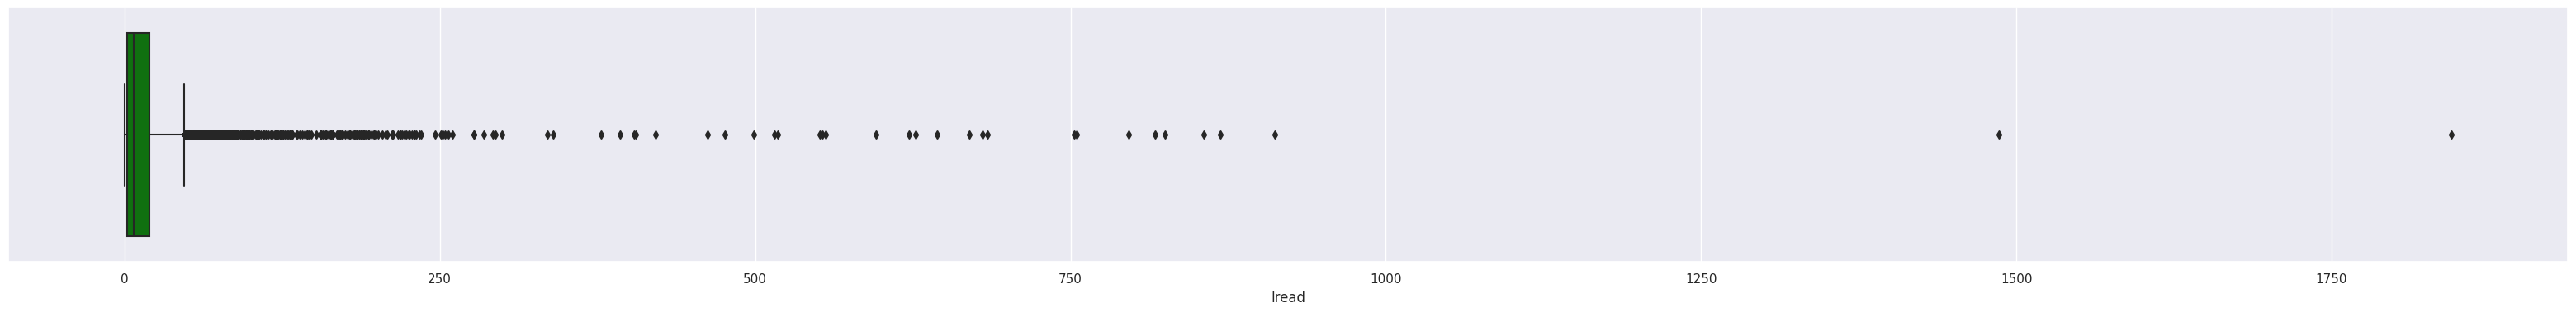

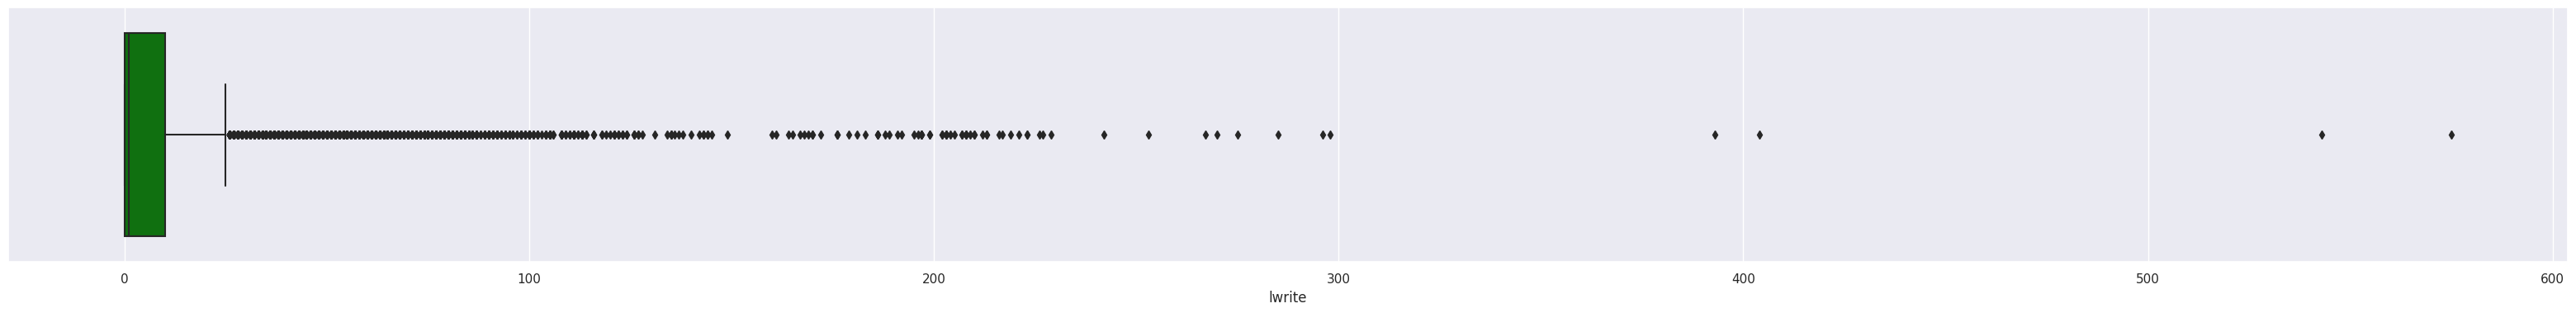

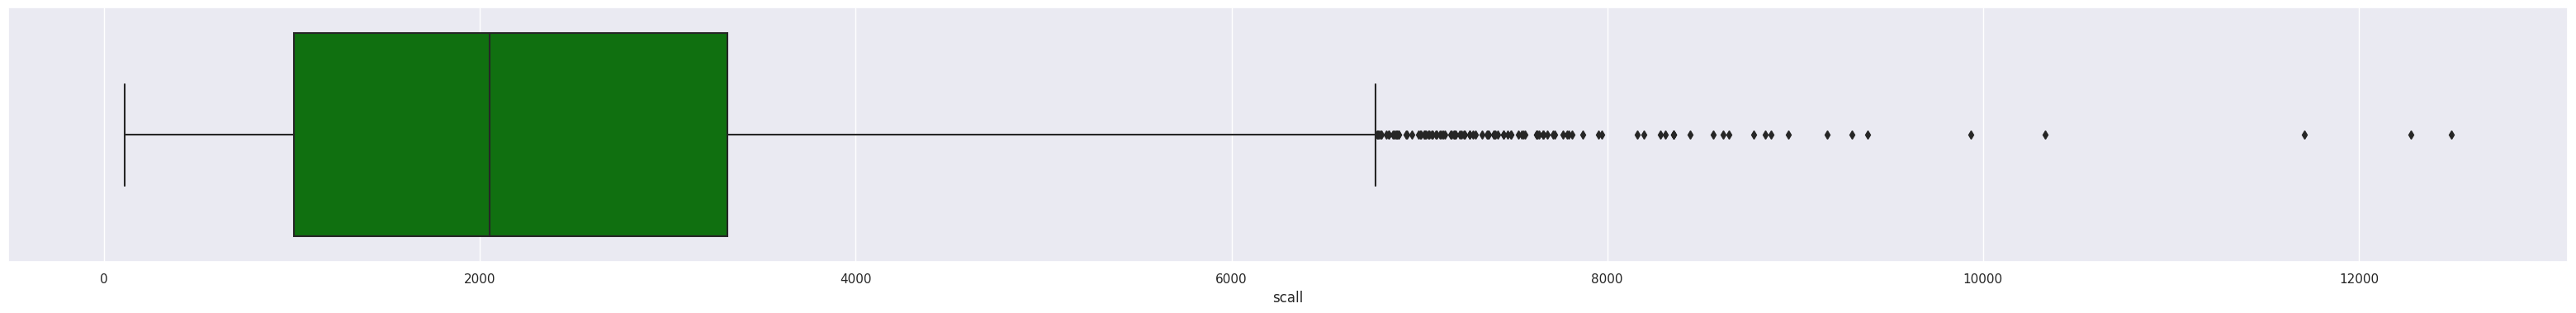

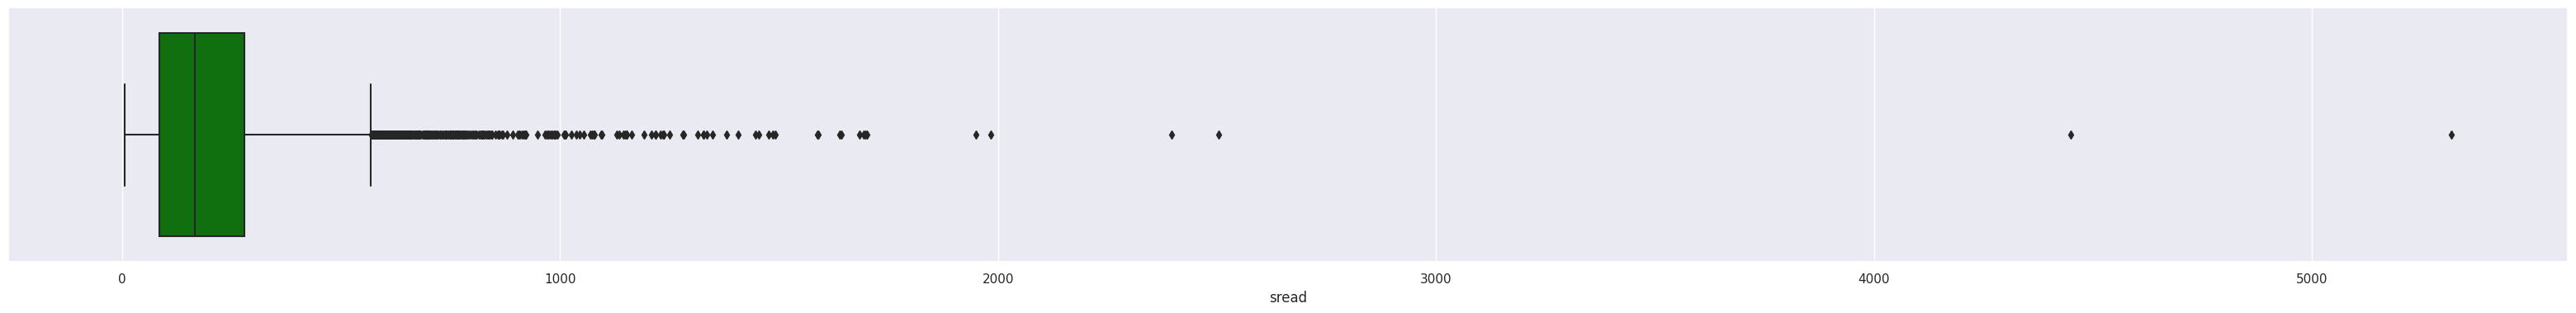

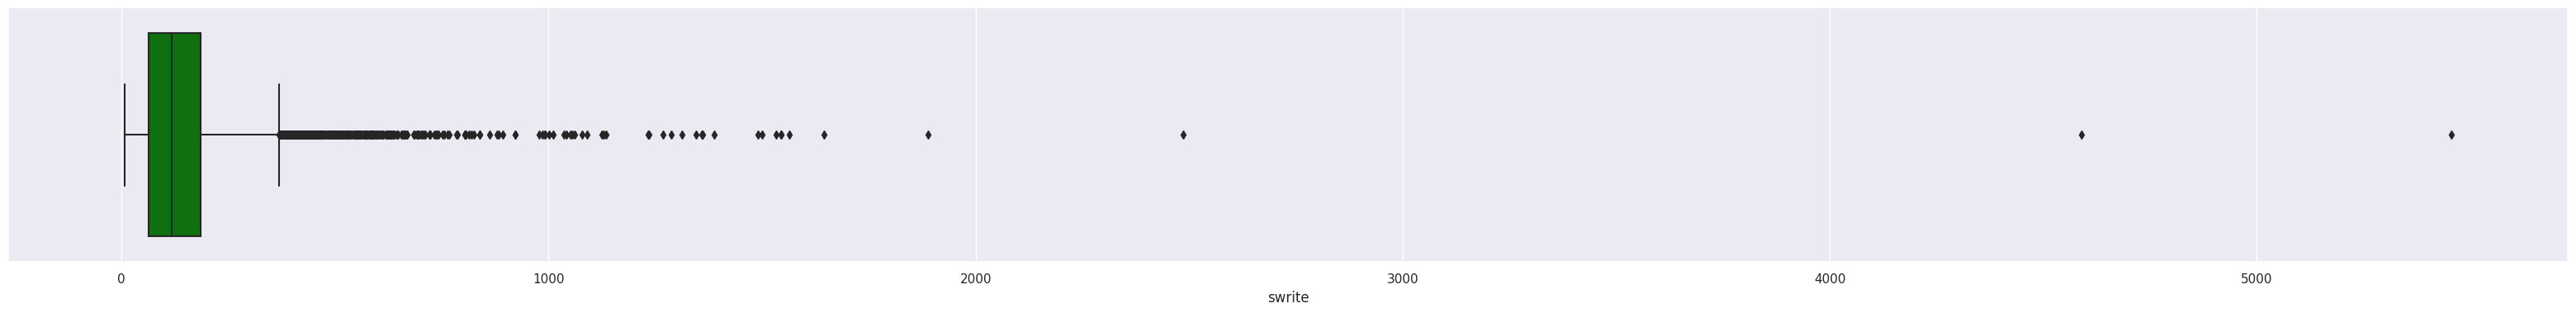

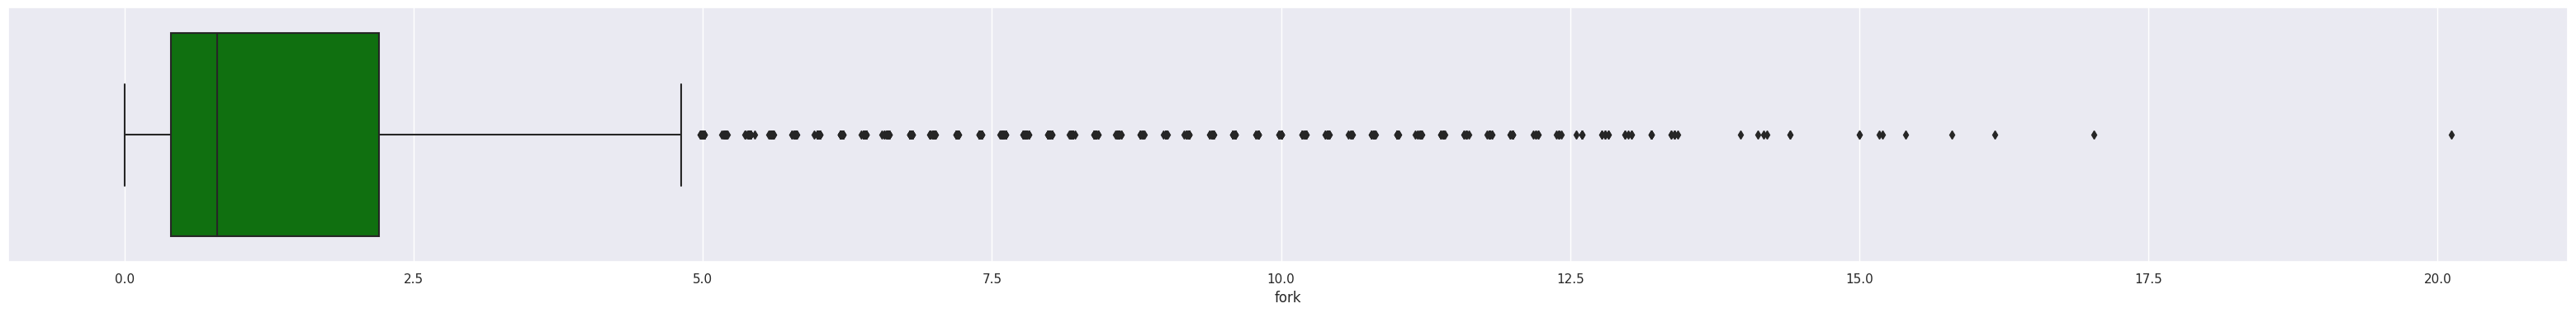

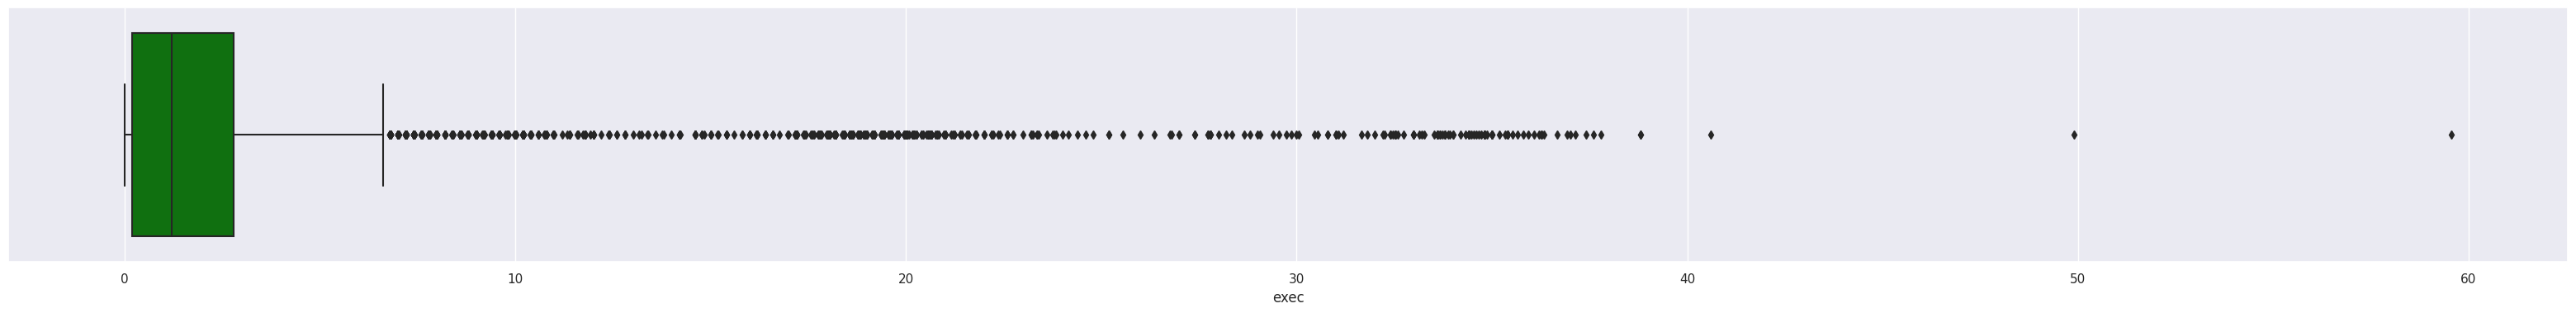

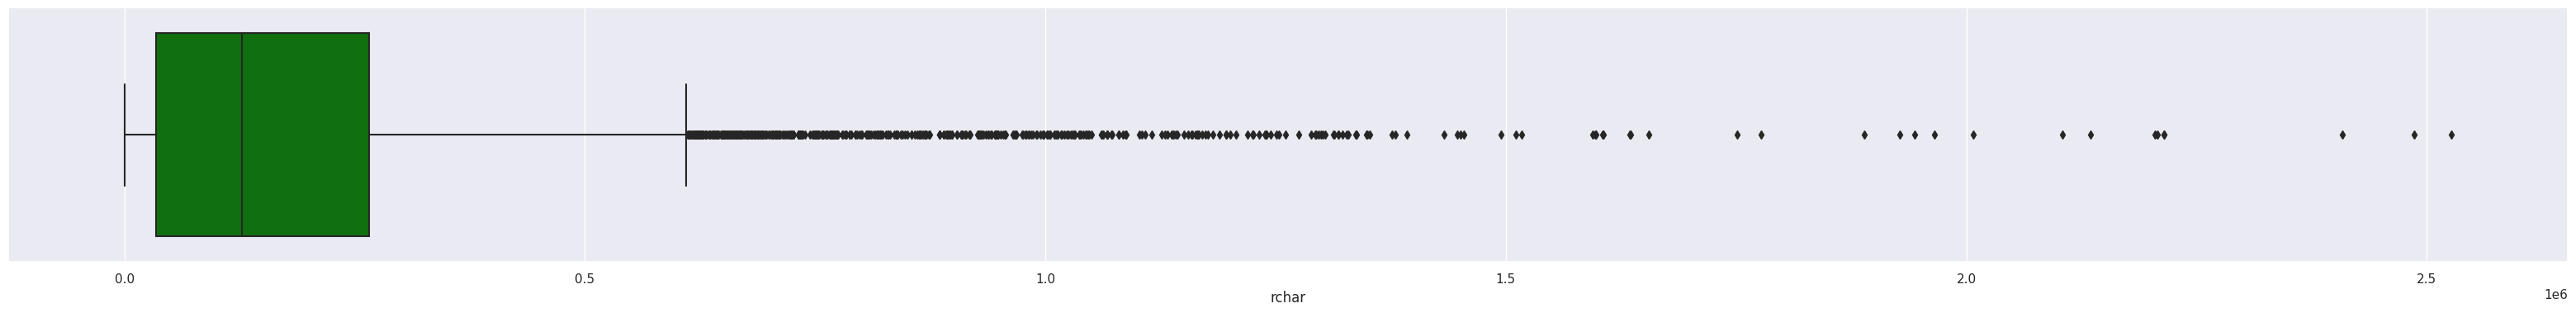

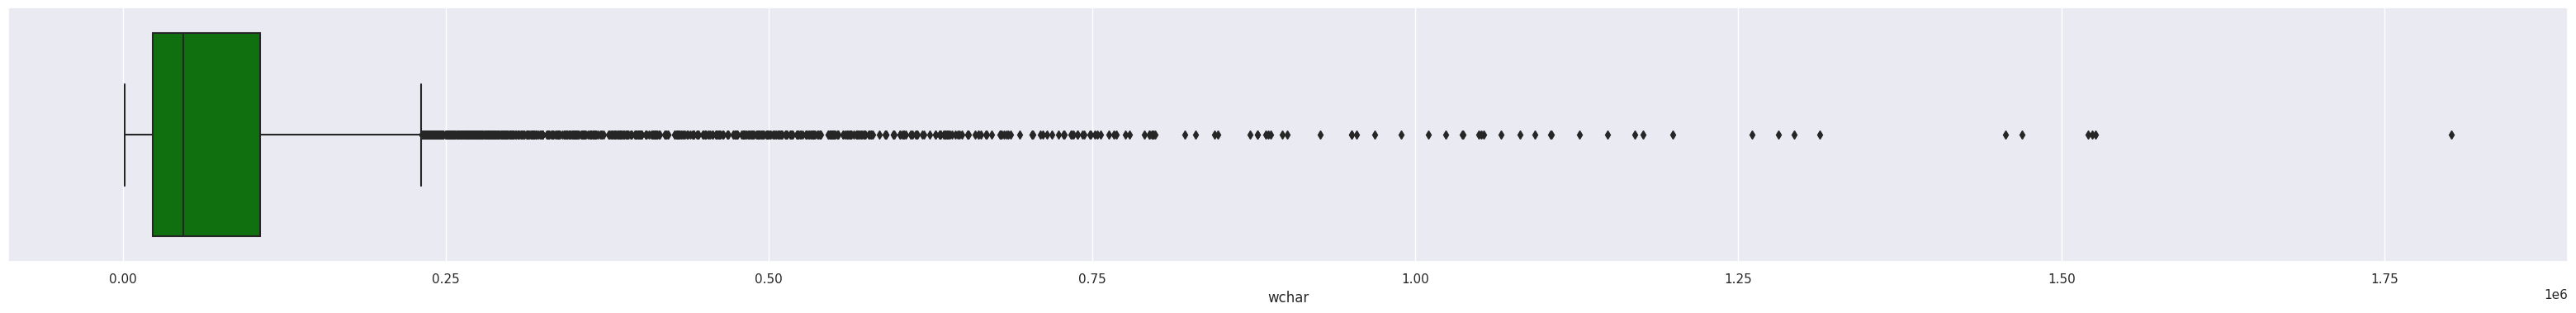

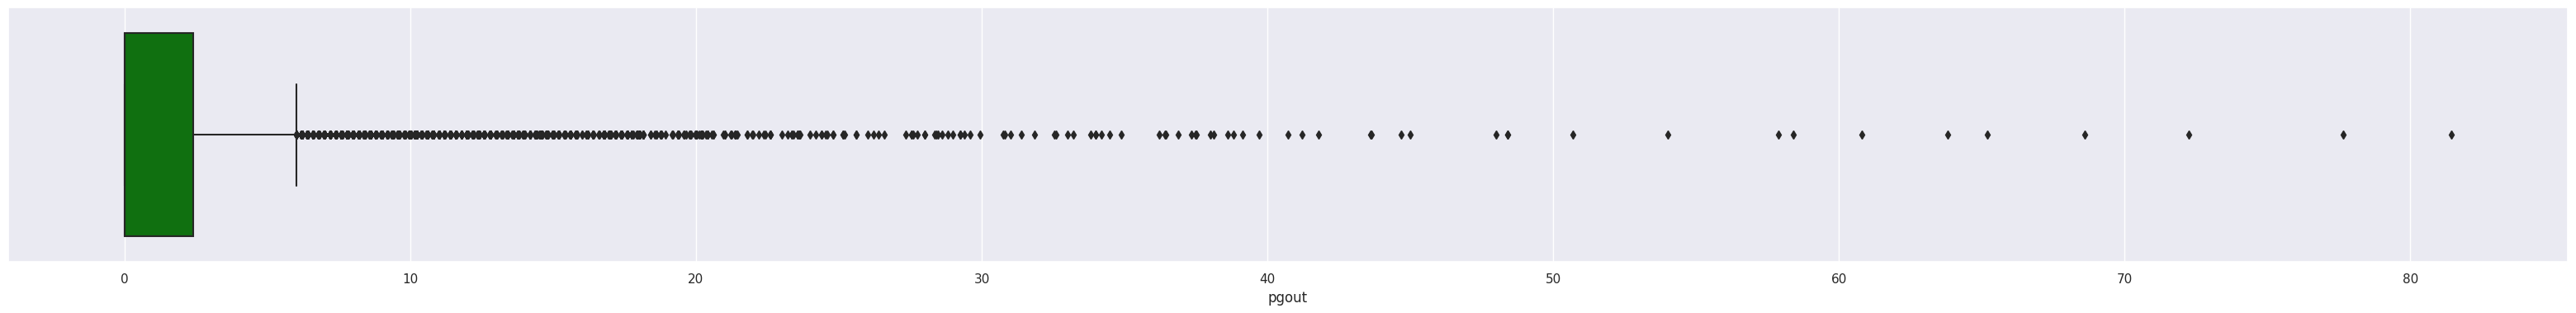

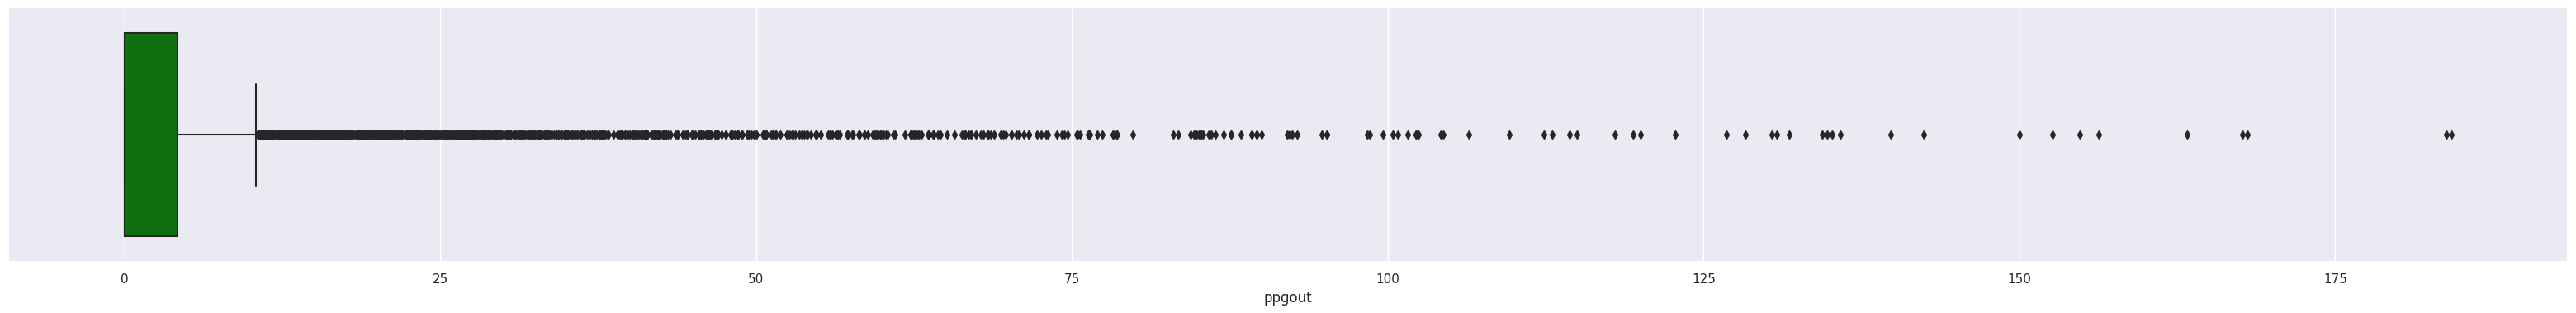

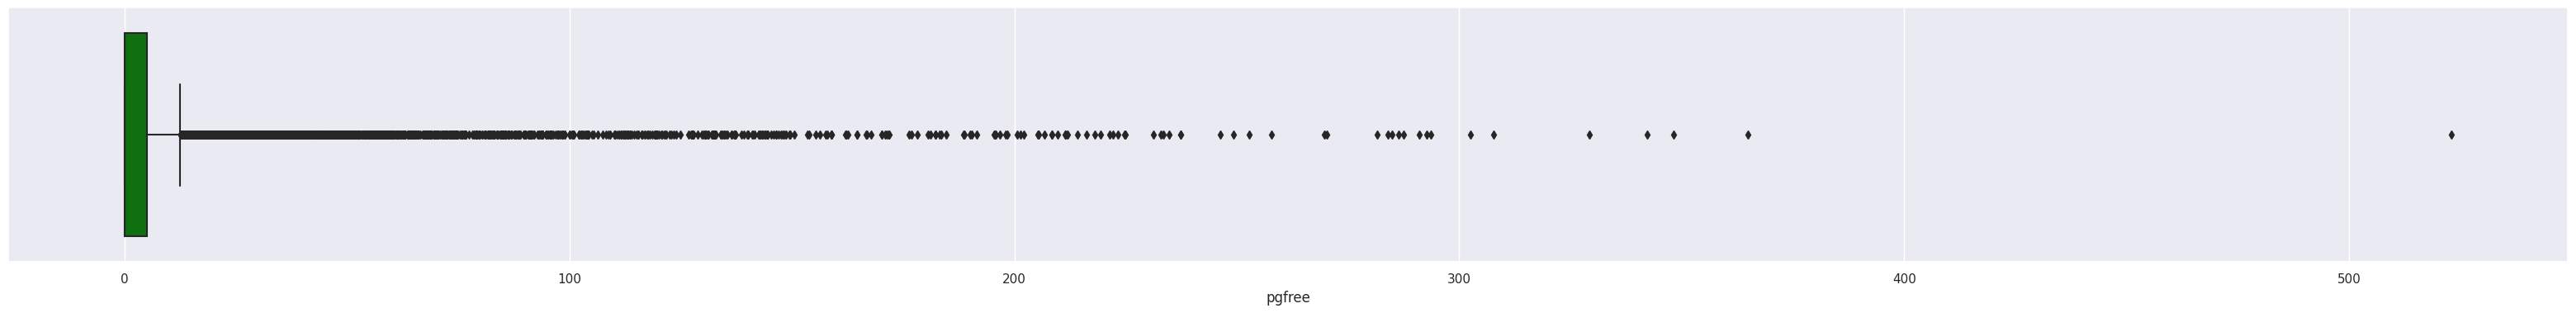

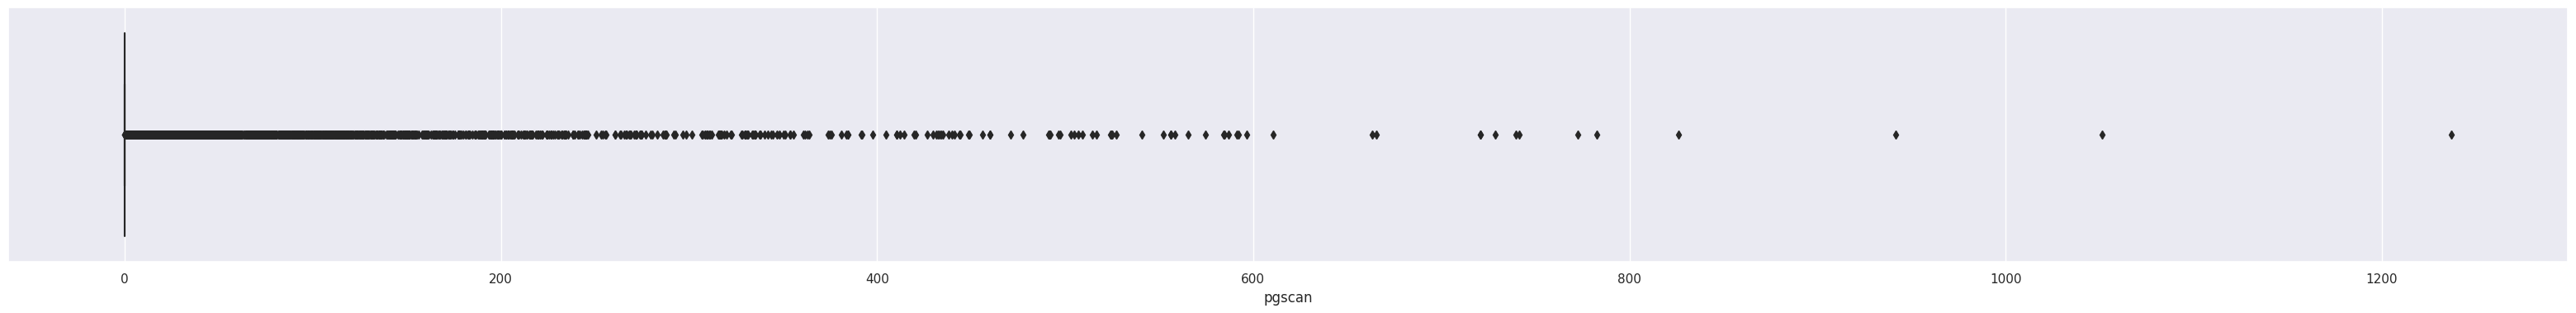

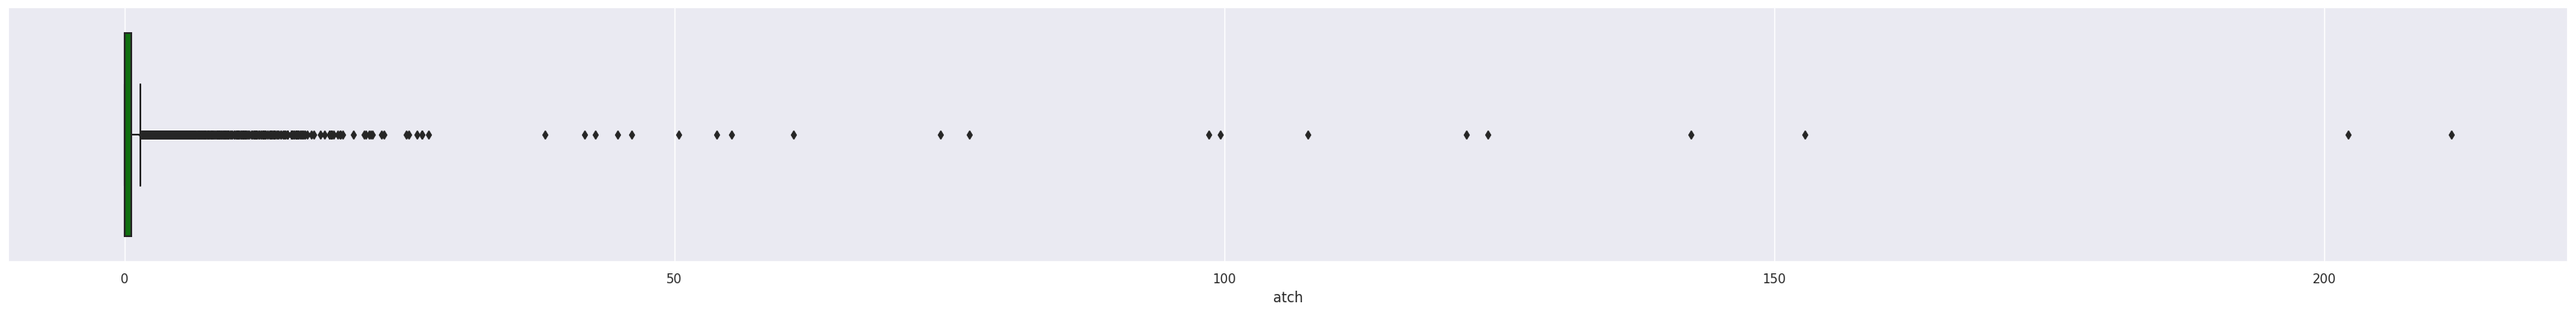

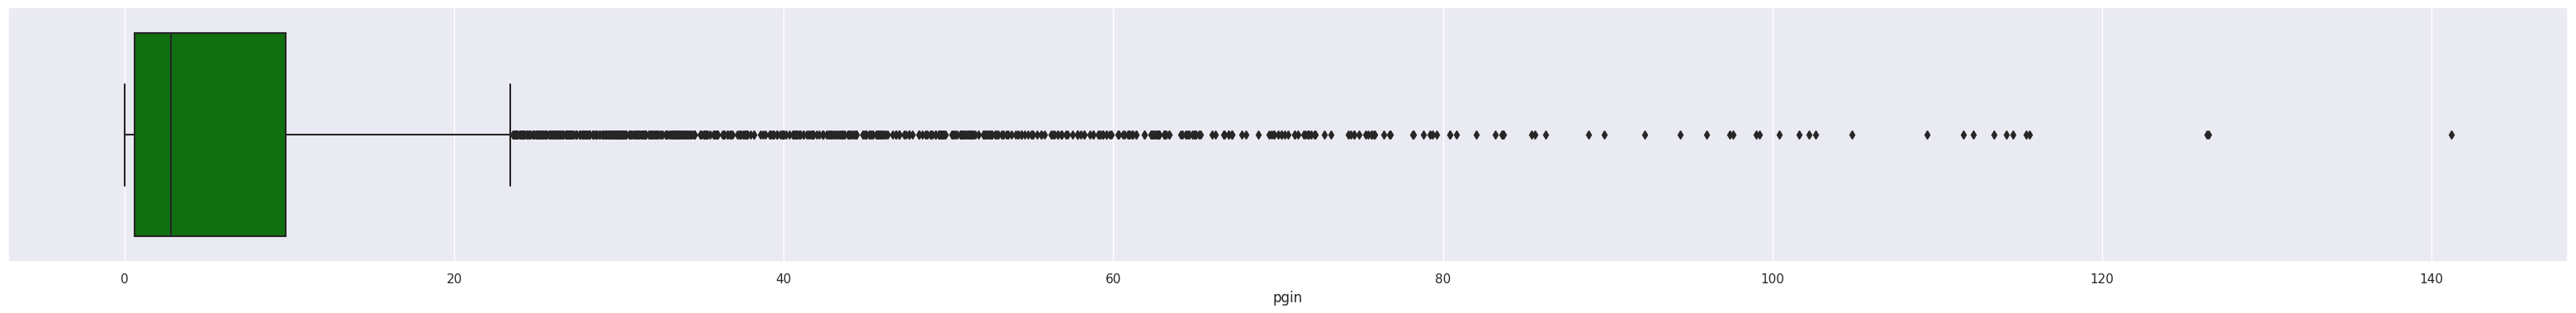

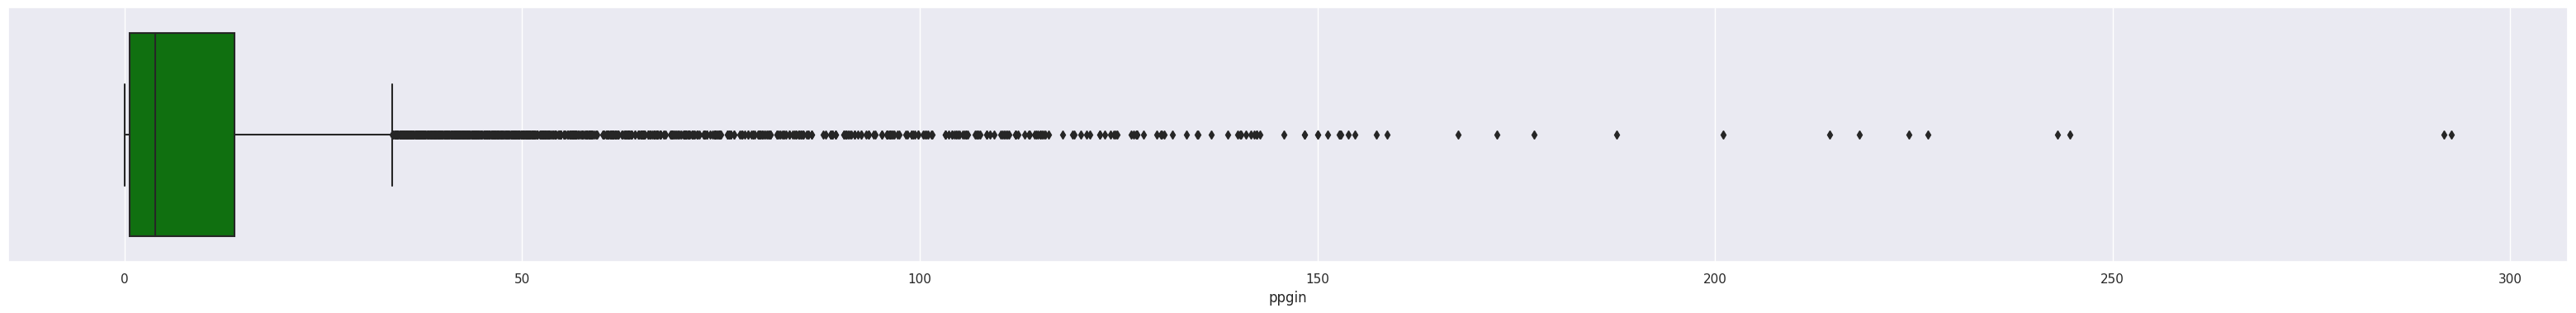

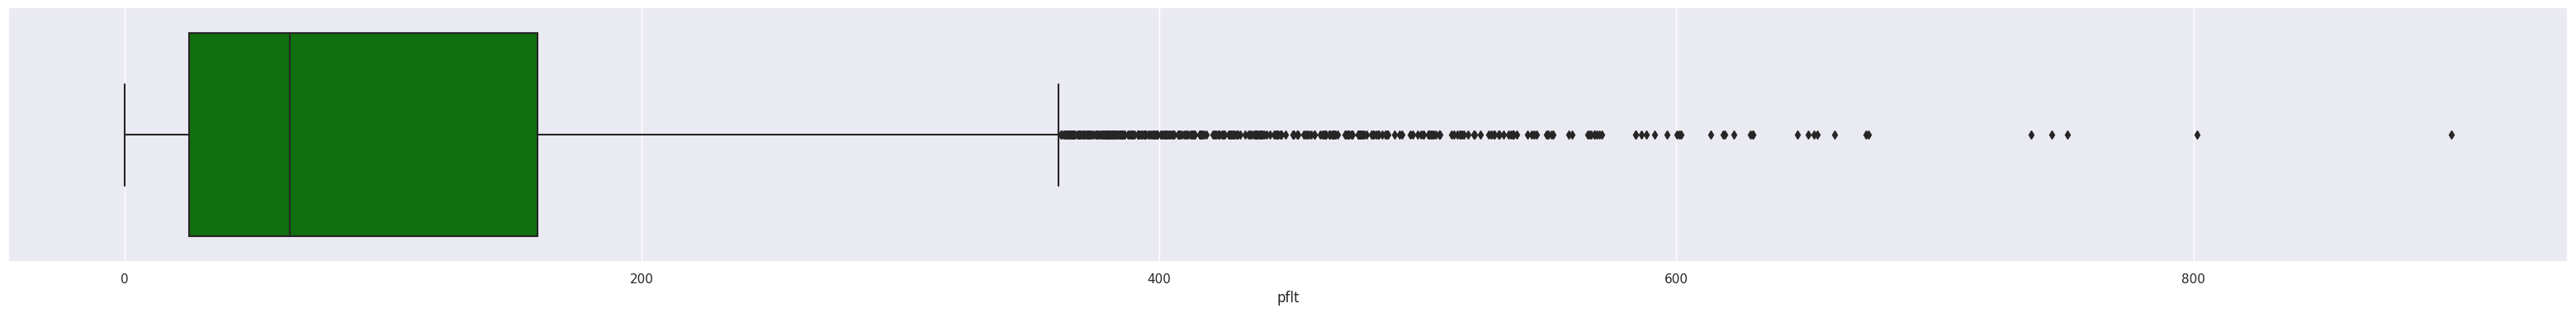

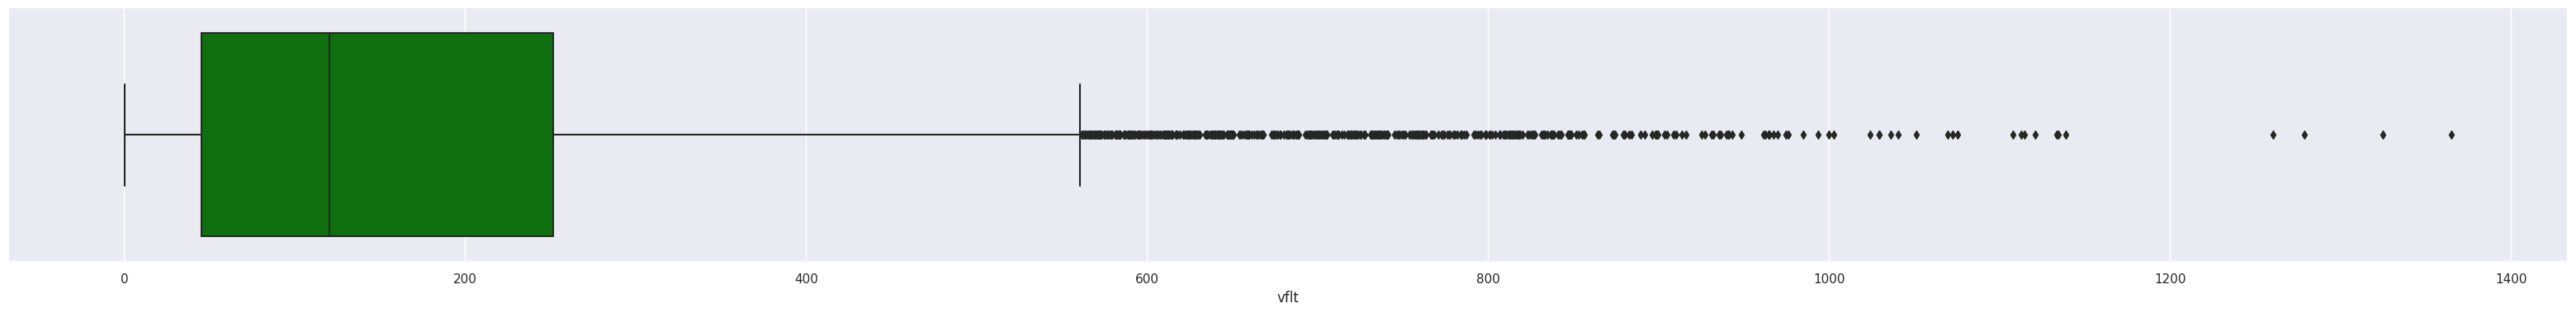

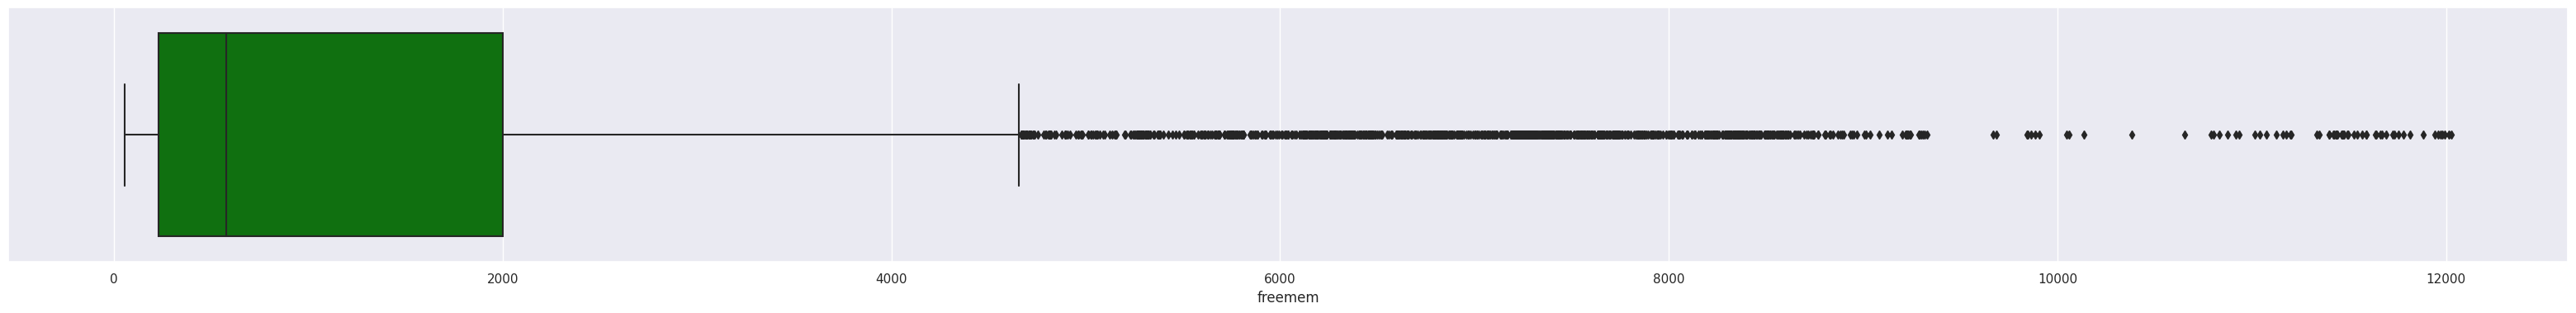

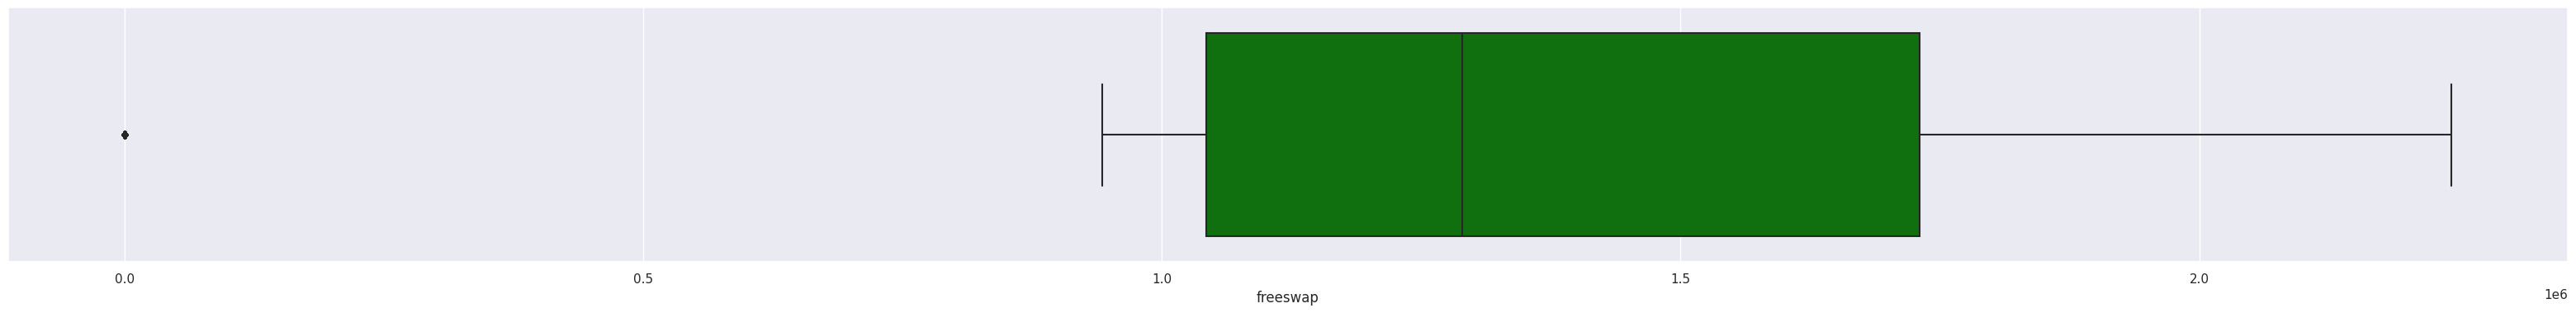

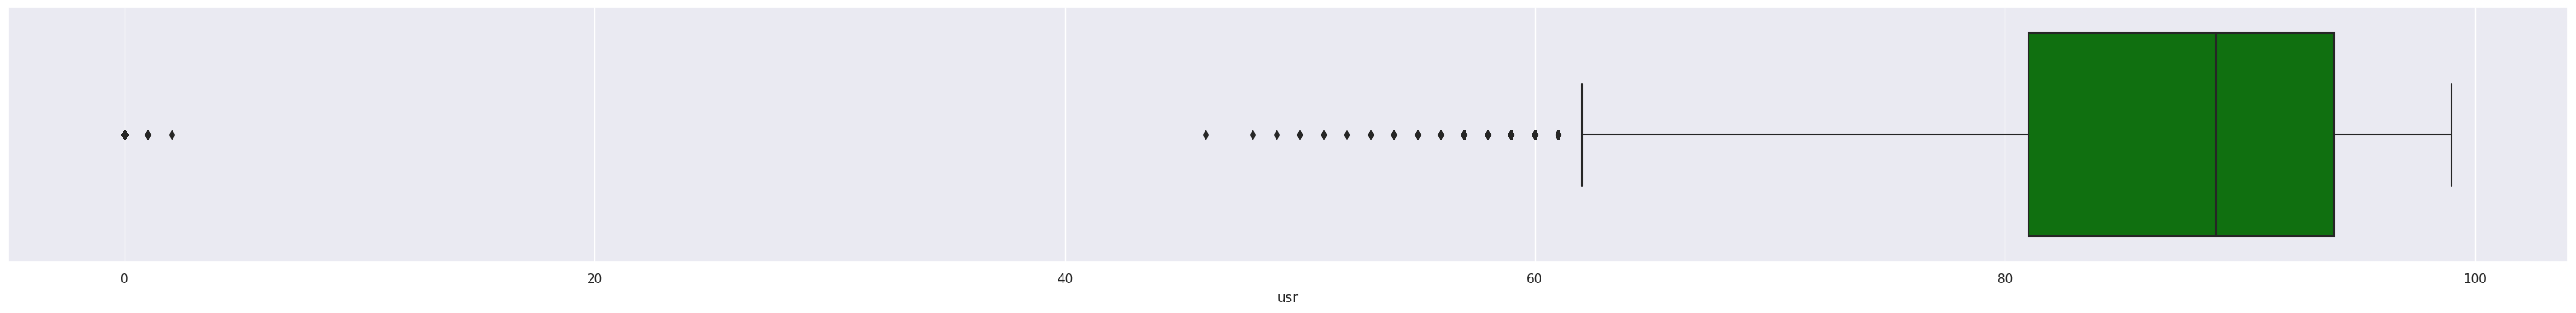

In [ ]:
#Identifying outliers using boxplots
for i in num_columns:
  sb.boxplot(data=df,x=i,color='green')
  plt.show()
  print("")


Outliers are present in all the attributes(lread, lwrite, scall, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pfit, vfit, freemem, freeswap, usr)

Only freeswap columns has less outliers

**Checking for duplicates**

In [ ]:
print("compactiv dataset has "+str(df.duplicated().sum())+" duplicates")

compactiv dataset has 0 duplicates


There are no duplicates in the given dataset

##1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

As we have already seen above, we have an attribute "runqsz" of object type.
It has only two values "CPU_Bound" and "Not_CPU_Bound", hence we can encode those with 0 and 1 respectively.

In [ ]:
df['runqsz'].value_counts()


1    4331
0    3861
Name: runqsz, dtype: int64

In [ ]:
df['runqsz']=np.where(df['runqsz']=='CPU_Bound',0,1)

In [ ]:
df['runqsz'].value_counts()

1    8192
Name: runqsz, dtype: int64

In [ ]:
df['runqsz'].dtype

dtype('int64')

Lets divide the data into x(independent) and y(dependent) varable data before splitting into training and testing data.

In [ ]:
x= df.drop('usr',axis=1)
y= df['usr']
print("Feature dataset has {0} rows and {1} columns".format(x.shape[0],x.shape[1]))
print("Shape of target dataset: ",y.shape)

Feature dataset has 8192 rows and 21 columns
Shape of target dataset:  (8192,)


splitting data into train and test datasets with test size being 30% of total data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print("Shape of training predictor dataset(x_train): ",x_train.shape)
print("Shape of test predictor dataset(x_test): ",x_test.shape)
print("Shape of training target dataset(y_train): ",y_train.shape)
print("Shape of test target dataset(y_test): ",y_test.shape)

Shape of training predictor dataset(x_train):  (5734, 21)
Shape of test predictor dataset(x_test):  (2458, 21)
Shape of training target dataset(y_train):  (5734,)
Shape of test target dataset(y_test):  (2458,)


Applying linear regression using LinearRegression library from scikit-learn
Fitting model with above generated training set.

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Getting score on training set

In [ ]:
print('The coefficient of determination R^2 of the prediction on Train set',model.score(x_train, y_train))
print('The coefficient of determination R^2 of the prediction on Test set',model.score(x_test, y_test))
rsquare_train = model.score(x_train, y_train)
rsquare_test = model.score(x_test, y_test)

The coefficient of determination R^2 of the prediction on Train set 0.5955534119691566
The coefficient of determination R^2 of the prediction on Test set 0.6025258965951572


Getting score on test set

In [ ]:
print('The coefficient of determination R^2 of the prediction on Test set',model.score(x_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.6025258965951572


Training and test scores are similar. Hence we can conclude there is no overfitting of data.


In [ ]:
y_train_predict = model.predict(x_train)

In [ ]:
y_test_predict = model.predict(x_test)

Get the RMSE on training and test set

In [ ]:
print("The Root Mean Square Error (RMSE) of the model for training set is: ",np.sqrt(mean_squared_error(y_train,y_train_predict)))
print("The Root Mean Square Error (RMSE) of the model for testing set is: ",np.sqrt(mean_squared_error(y_test,y_test_predict)))
RMSE_Train= np.sqrt(mean_squared_error(y_train,y_train_predict))
RMSE_Train = np.sqrt(mean_squared_error(y_test,y_test_predict))

The Root Mean Square Error (RMSE) of the model for training set is:  11.592349982963874
The Root Mean Square Error (RMSE) of the model for testing set is:  11.8494009997206


In [ ]:
print("Adjusted R square of the model for training set is: ",(1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)))
print("Adjusted R square of the model for testing set is: ",(1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))
adj_rsquared_train = (1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
adj_rsquared_test = (1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))


Adjusted R square of the model for training set is:  0.5940664759837491
Adjusted R square of the model for testing set is:  0.5990993957037362


Checking Multicolinearity using VIF

In [ ]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [ ]:
vif_series = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print(vif_series.sort_values(ascending=False))

runqsz      22.997389
vflt        18.826704
fork        17.963683
pgfree      17.631080
ppgout      14.830251
pflt        11.277958
ppgin        8.138474
pgin         7.658848
pgscan       7.598853
sread        6.870995
pgout        5.482303
swrite       5.399046
exec         3.065804
scall        2.422662
rchar        1.957076
freeswap     1.728751
freemem      1.648911
wchar        1.585701
lread        1.491185
lwrite       1.433509
atch         1.089723
dtype: float64


In [ ]:
multicolinear_columns=vif_series[vif_series>3].sort_values(ascending=False).index
print(multicolinear_columns)

Index(['runqsz', 'vflt', 'fork', 'pgfree', 'ppgout', 'pflt', 'ppgin', 'pgin',
       'pgscan', 'sread', 'pgout', 'swrite', 'exec'],
      dtype='object')


As few predictors have VIF values > 3 therefore there is some multicolinearity in the data. Assuming VIF > 3 indicates strong multicolinearity.

Lets try to remove columns which contributes to multicolinearity by checking how the r2 value changes when a attribute is deleted.

In [ ]:
x_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [ ]:
dropped_columns=[]
for i in multicolinear_columns:
  x_train1 = x_train.drop([i],axis=1)
  model1 = LinearRegression()
  model1.fit(x_train1,y_train)
  new_rsquare=model1.score(x_train1,y_train)
  new_adjusted_rsquare = (1 - (1-model1.score(x_train1, y_train))*(len(y_train)-1)/(len(y_train)-x_train1.shape[1]-1))
  print("Drop in adjusted rsquare value after deleting "+i+": ",(adj_rsquared_train-new_adjusted_rsquare).round(3))
  if(((adj_rsquared_train-new_adjusted_rsquare)<=0.005) and (np.sqrt(mean_squared_error(y_train,model1.predict(x_train1)))>RMSE_Train)):
    print("Dropping '"+i+"' from training and test dataset as the change in adjusted r2 due to this column is negligible")
    dropped_columns.append(i)
    x_train.drop([i],axis=1,inplace=True)
    x_test.drop([i],axis=1,inplace=True)
    multicolinear_columns=multicolinear_columns.drop(i)
  print("\n")
print(dropped_columns)
print("score after removing columns causing multicollinearity: ",model1.score(x_train1,y_train))



Drop in adjusted rsquare value after deleting runqsz:  -0.0


Drop in adjusted rsquare value after deleting vflt:  0.003


Drop in adjusted rsquare value after deleting fork:  0.004


Drop in adjusted rsquare value after deleting pgfree:  0.001


Drop in adjusted rsquare value after deleting ppgout:  0.0


Drop in adjusted rsquare value after deleting pflt:  0.006


Drop in adjusted rsquare value after deleting ppgin:  -0.0


Drop in adjusted rsquare value after deleting pgin:  -0.0


Drop in adjusted rsquare value after deleting pgscan:  0.0


Drop in adjusted rsquare value after deleting sread:  -0.0


Drop in adjusted rsquare value after deleting pgout:  0.0


Drop in adjusted rsquare value after deleting swrite:  -0.0


Drop in adjusted rsquare value after deleting exec:  -0.0


[]
score after removing columns causing multicollinearity:  0.595540793005533


In [ ]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
print("The Root Mean Square Error (RMSE) of the model for training set is: ",np.sqrt(mean_squared_error(y_train,model1.predict(x_train))))

The Root Mean Square Error (RMSE) of the model for training set is:  11.592349982963874


In [ ]:
print(model1.coef_.round(2))

[-0.02  0.01  0.    0.   -0.   -1.92  0.02 -0.   -0.   -0.17  0.11 -0.08
  0.01 -0.06  0.02 -0.02 -0.04  0.02  0.   -0.    0.  ]


In [ ]:
x_train.drop(['scall','fork','rchar','freemem'],axis=1,inplace=True)
x_test.drop(['scall','fork','rchar','freemem'],axis=1,inplace=True)

In [ ]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
print("The Root Mean Square Error (RMSE) of the model for training set is: ",np.sqrt(mean_squared_error(y_train,model1.predict(x_train))))

The Root Mean Square Error (RMSE) of the model for training set is:  12.053564687699861


In [ ]:

print("The Root Mean Square Error (RMSE) of the model for testing set is: ",np.sqrt(mean_squared_error(y_test,model1.predict(x_test))))
model1.score(x_train,y_train)

The Root Mean Square Error (RMSE) of the model for testing set is:  12.371500074547622


0.5627304725964608

**Using OLS method to fetch feature importance**

In [ ]:
import statsmodels.api as sm
ols_x = sm.add_constant(x_train)
ols_y = sm.add_constant(y_train)
OLSModel = sm.OLS(y_train,ols_x).fit()
print(OLSModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     459.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:04:40   Log-Likelihood:                -22410.
No. Observations:                5734   AIC:                         4.485e+04
Df Residuals:                    5717   BIC:                         4.497e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0223      0.003     -6.667      0.0

The p-value for each term tests the null hypothesis that the coefficients (b1, b2, ..., bn) are equal to zero causing no effect to the fitting equation y = b0 + b1x1 + b2x2... A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable (y).

In [ ]:
OLSModel.pvalues[x_train.columns].round(2)

lread       0.00
lwrite      0.09
sread       0.28
swrite      0.29
exec        0.08
wchar       0.00
pgout       0.25
ppgout      0.02
pgfree      0.00
pgscan      0.07
atch        0.02
pgin        0.00
ppgin       0.01
pflt        0.00
vflt        0.03
runqsz      0.00
freeswap    0.00
dtype: float64

In [ ]:
x_train.drop(['lwrite','sread','swrite','exec','pgscan','pgin','ppgin'],axis=1,inplace=True)
x_test.drop(['lwrite','sread','swrite','exec','pgscan','pgin','ppgin'],axis=1,inplace=True)

In [ ]:
final_model = LinearRegression()
final_model.fit(x_train,y_train)
print(final_model.score(x_test,y_test))
print("RSME",np.sqrt(mean_squared_error(y_test,final_model.predict(x_test))))


0.5625830262675559
RSME 12.430534219477513


##1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [ ]:
linear_equation=""
for i in range(0,len(final_model.coef_)):
  linear_equation=linear_equation+"("+str(final_model.coef_[i].round(6))+")*"+final_model.feature_names_in_[i]+"+"
linear_equation= linear_equation+str(final_model.intercept_.round(3))
print(linear_equation)

(-0.018462)*lread+(-1.5e-05)*wchar+(-0.101838)*pgout+(0.093108)*ppgout+(-0.033474)*pgfree+(-0.067413)*atch+(-0.05585)*pflt+(0.007446)*vflt+(0.0)*runqsz+(2.6e-05)*freeswap+55.61


**Testing the Assumptions of Linear Regression**

For Linear Regression, we need to check if the following assumptions hold:-

Linearity

Independence

Homoscedasticity

Normality of error terms

No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = final_model.predict(x_train)  # predicted values
df_pred["Residuals"] = (df_pred['Actual Values']-df_pred['Fitted Values'])  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,96,91.133243,4.866757
1,0,41.078204,-41.078204
2,91,95.085797,-4.085797
3,97,105.529133,-8.529133
4,75,80.598874,-5.598874


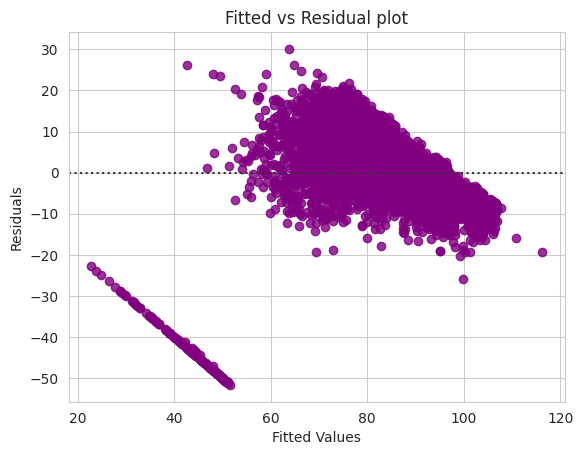

In [ ]:
# let us plot the fitted values vs residuals
sb.set_style("whitegrid")
sb.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern in the data thus the assumption of linearity and independence of predictors satisfied

In [ ]:
from scipy import stats
print(stats.shapiro(df_pred["Residuals"]))

ShapiroResult(statistic=0.8570492267608643, pvalue=0.0)


Since p-value < 0.05, the residuals are not normal as per shapiro test.

In [ ]:
#This step is just to check if removal of attributes that have very less coefficient values increase our models explainability and accuracy.
x_train.drop(['rchar','wchar','freeswap'],axis=1,inplace=True)
x_test.drop(['rchar','wchar','freeswap'],axis=1,inplace=True)
final_model2 = LinearRegression()
final_model2.fit(x_train,y_train)
print(final_model2.score(x_test,y_test))
print("RSME",np.sqrt(mean_squared_error(y_test,final_model2.predict(x_test))))

0.2487199428509137
RSME 16.290818605658288


Though the variables rchar, wchar and freeswap have very less coefficient values, we cannot deleted those as dropping those columns is reducing the our model accuracy and increasing RSME value. Hence we choose not to drop them.

#Problem 2: Logistic Regression, LDA and CART
------------------------------
You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem 2: Contraceptive_method_dataset.xlsx

Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

##2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

**Read the Dataset and storing the data in df variable**

In [121]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Contraceptive_method_dataset.xlsx")


**Sample Data**

In [122]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


import numpy as np
from google.colab import autoviz
df_8709798553655046883 = autoviz.get_registered_df('df_8709798553655046883')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8709798553655046883, *['Wife_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8478516791765084468 = autoviz.get_registered_df('df_8478516791765084468')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8478516791765084468, *['No_of_children_born'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8101657355997677202 = autoviz.get_registered_df('df_8101657355997677202')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8101657355997677202, *['Husband_Occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3022892295801367933 = autoviz.get_registered_df('df_3022892295801367933')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3022892295801367933, *['Wife_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9019083462145392408 = autoviz.get_registered_df('df_9019083462145392408')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9019083462145392408, *['No_of_children_born'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4610217560658693804 = autoviz.get_registered_df('df_4610217560658693804')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4610217560658693804, *['Husband_Occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7370953898049189424 = autoviz.get_registered_df('df_7370953898049189424')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7370953898049189424, *['Wife_ education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2286101384416481750 = autoviz.get_registered_df('df_2286101384416481750')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2286101384416481750, *['Husband_education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2663423068780721220 = autoviz.get_registered_df('df_2663423068780721220')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2663423068780721220, *['Standard_of_living_index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1671215930684535717 = autoviz.get_registered_df('df_1671215930684535717')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1671215930684535717, *[[['Wife_age', 'No_of_children_born'], ['No_of_children_born', 'Husband_Occupation']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4797786476151384339 = autoviz.get_registered_df('df_4797786476151384339')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4797786476151384339, *['Wife_ education', 'Husband_education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8953045946126808616 = autoviz.get_registered_df('df_8953045946126808616')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8953045946126808616, *['Husband_education', 'Standard_of_living_index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8747980168038920582 = autoviz.get_registered_df('df_8747980168038920582')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8747980168038920582, *['Wife_age', 'Wife_ education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5073702841965007983 = autoviz.get_registered_df('df_5073702841965007983')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5073702841965007983, *['Wife_age', 'Husband_education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4510686042662548375 = autoviz.get_registered_df('df_4510686042662548375')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4510686042662548375, *['Wife_age', 'Standard_of_living_index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8230433854153807520 = autoviz.get_registered_df('df_8230433854153807520')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8230433854153807520, *['No_of_children_born', 'Wife_ education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3273662052239166424 = autoviz.get_registered_df('df_3273662052239166424')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3273662052239166424, *['Husband_Occupation', 'Wife_age', 'Wife_ education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6688785257999718918 = autoviz.get_registered_df('df_6688785257999718918')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6688785257999718918, *['Husband_Occupation', 'Wife_age', 'Husband_education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8576134316359608696 = autoviz.get_registered_df('df_8576134316359608696')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8576134316359608696, *['Husband_Occupation', 'Wife_age', 'Standard_of_living_index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4938273455401838480 = autoviz.get_registered_df('df_4938273455401838480')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4938273455401838480, *['Husband_Occupation', 'No_of_children_born', 'Wife_ education'], **{})
chart

**Data shape, datatypes, record counts, null entries**

In [123]:
df.shape

(1473, 10)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


There are 80 records that are duplicates. Lets remove them.

In [125]:
df.duplicated().sum()

80

In [126]:
df.drop_duplicates(inplace=True)
df.shape

(1393, 10)

In [127]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Null values present in Wife_age and No_of_children_born

**Five point summary**

In [128]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,32.557,8.289,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1372.0,3.291,2.400,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174,0.855,1.0,1.0,2.0,3.0,4.0


import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5992843310801654448, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5992843310801654448, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5992843310801654448, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5992843310801654448, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5992843310801654448, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5992843310801654448, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5992843310801654448, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5992843310801654448, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5992843310801654448, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5992843310801654448, *['count', 'mean', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5992843310801654448, *['count', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5992843310801654448, *['count', 'min', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992843310801654448 = autoviz.get_registered_df('df_5992843310801654448')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5992843310801654448, *['count', '25%', None], **{})
chart

From the above summary, we can see that mean and medain are almost near and that means there is very little skew in data.

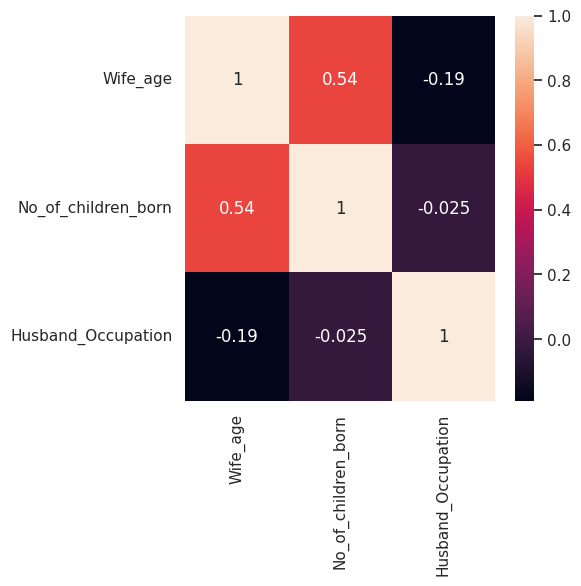

In [129]:
plt.figure(figsize=(5,5))
sb.heatmap(df[['Wife_age','No_of_children_born','Husband_Occupation']].corr(),annot=True);

**Univariate Analysis**

Checking Distribution of Wife_age, No_of_children_born and Husband_Occupation

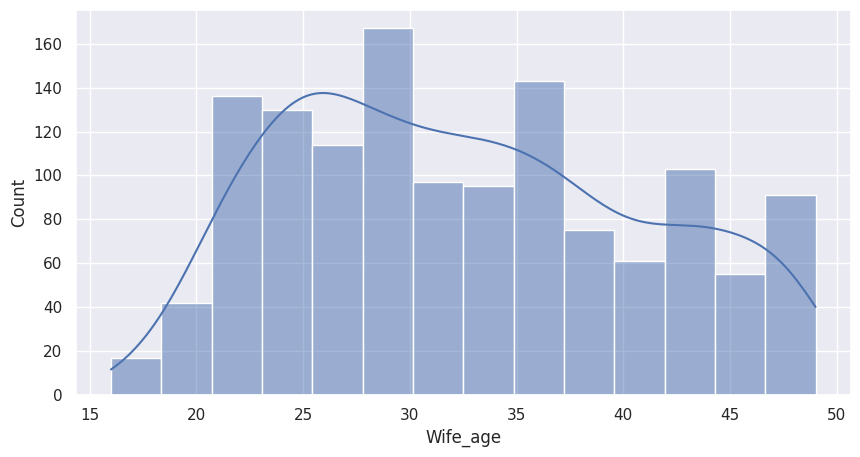

In [130]:
plt.figure(figsize=(10,5))
sb.histplot(df.Wife_age,kde=True);

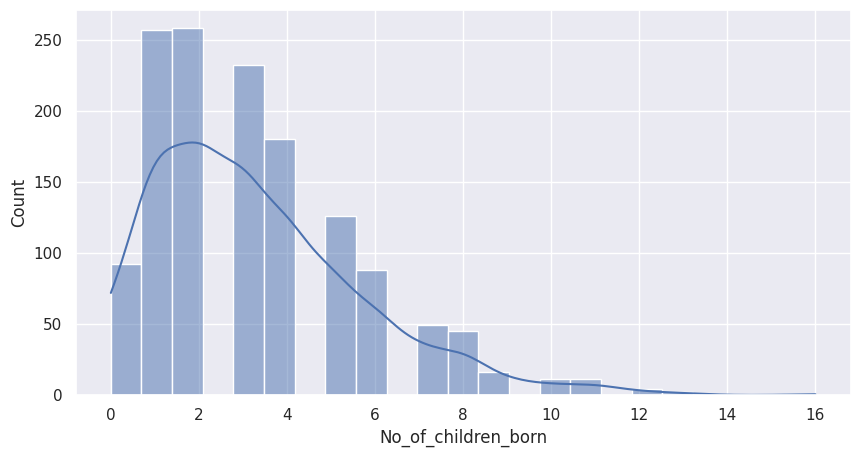

In [131]:
plt.figure(figsize=(10,5))
sb.histplot(df.No_of_children_born,kde=True);

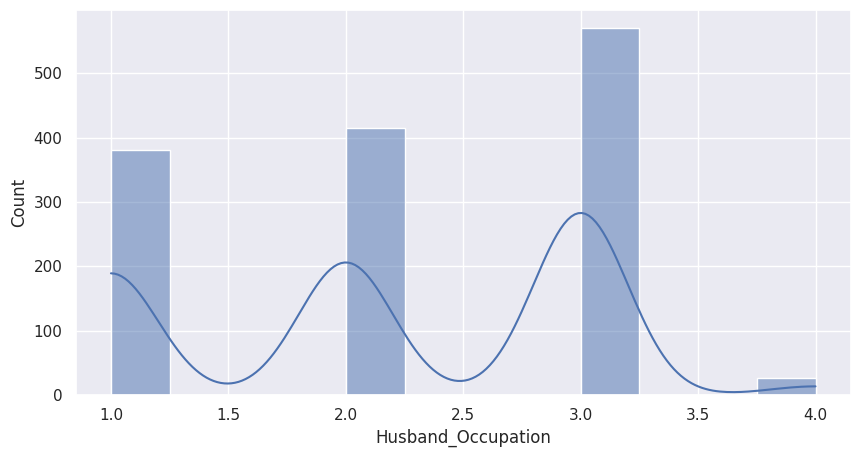

In [132]:
plt.figure(figsize=(10,5))
sb.histplot(df.Husband_Occupation,kde=True);

###**Bivariate Analysis**

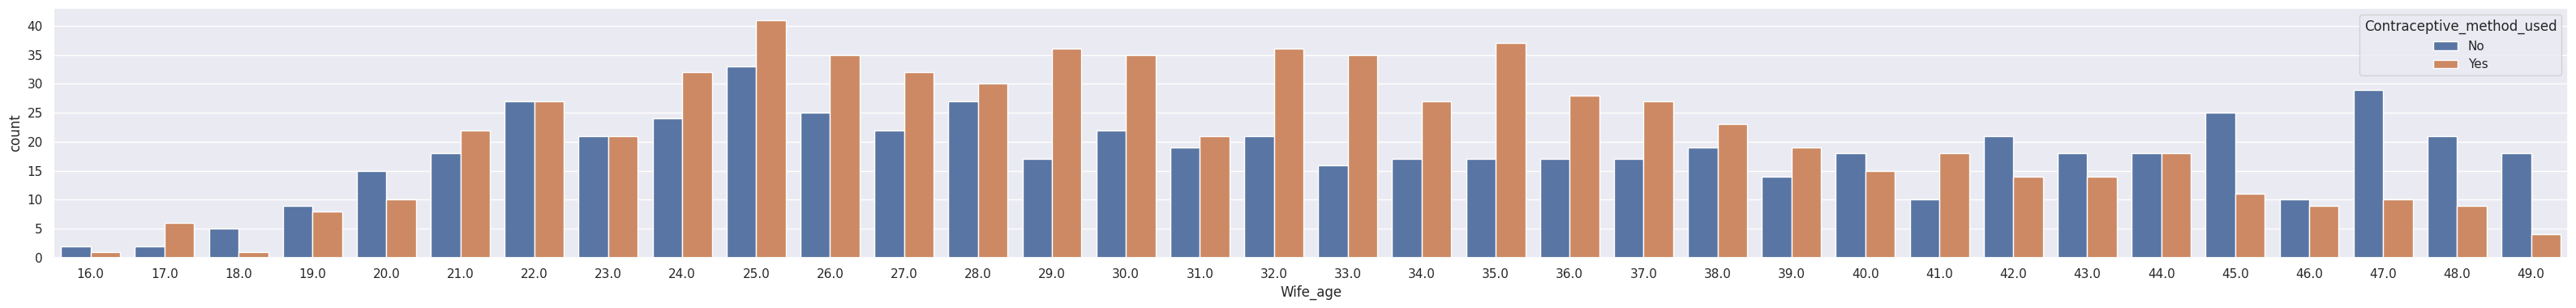

In [133]:
sb.countplot(data=df, hue=df.Contraceptive_method_used, x=df.Wife_age);

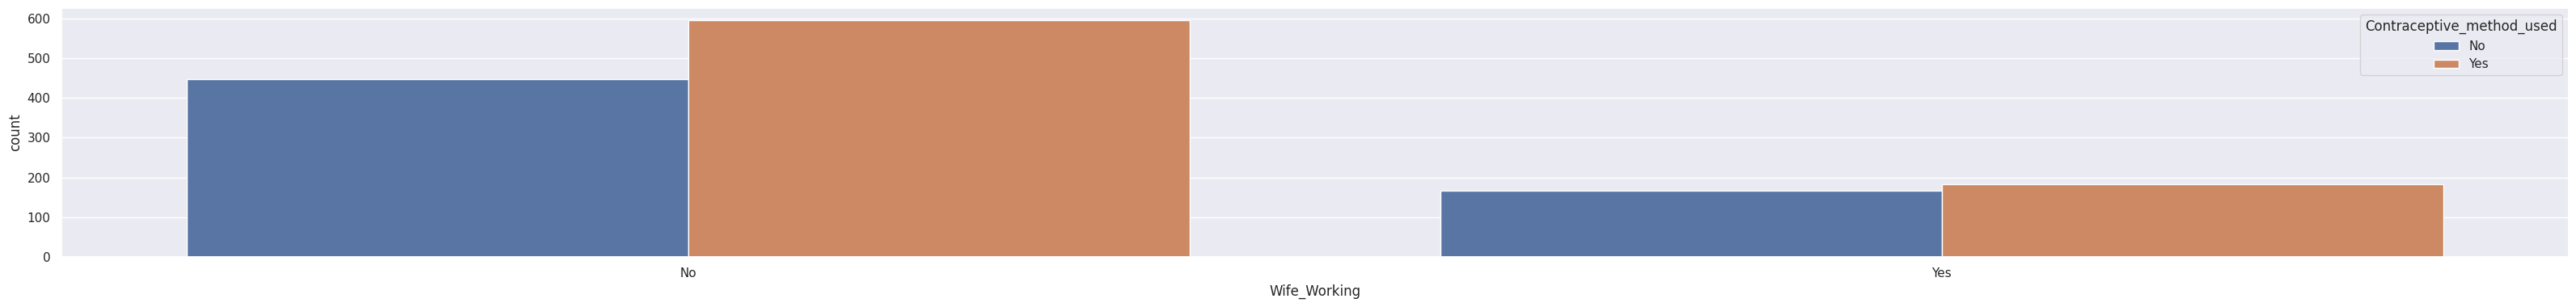

In [134]:
sb.countplot(data=df, x= df.Wife_Working, hue='Contraceptive_method_used');

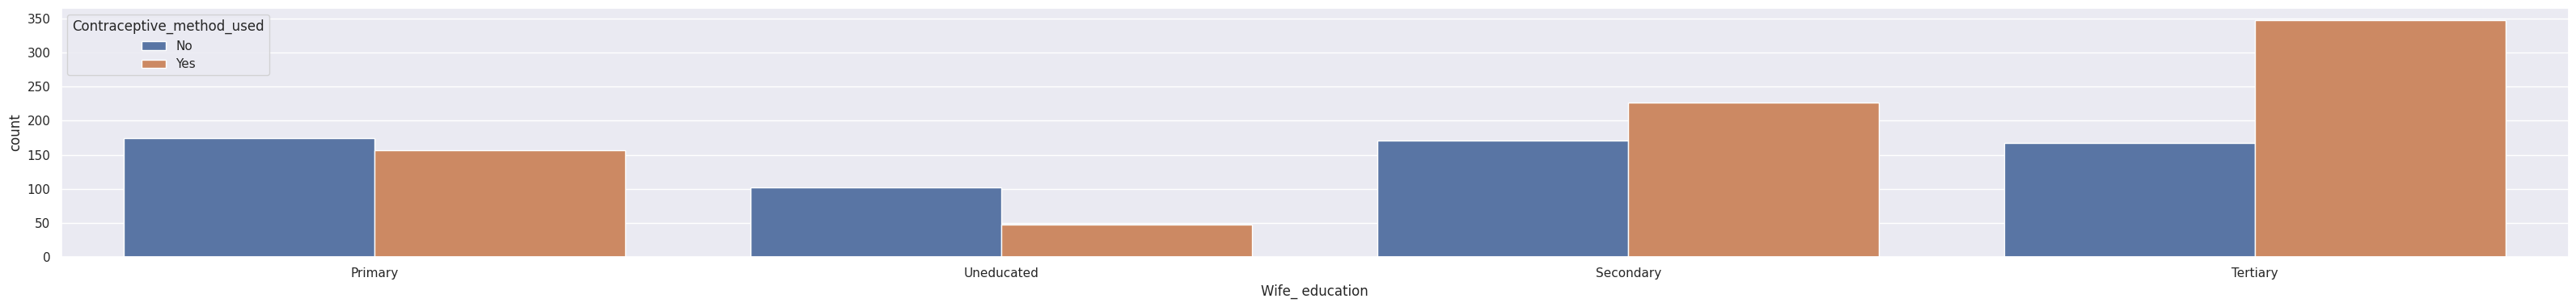

In [135]:
sb.countplot(data=df, x= df['Wife_ education'], hue='Contraceptive_method_used');

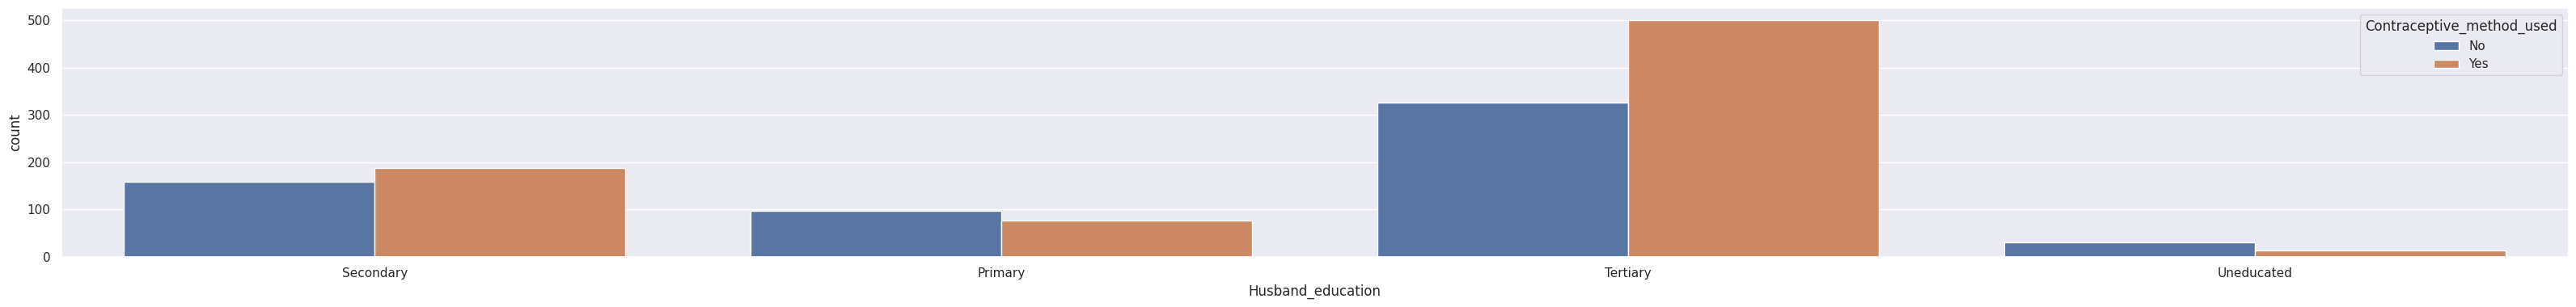

In [136]:

sb.countplot(data=df, x= df['Husband_education'], hue='Contraceptive_method_used');

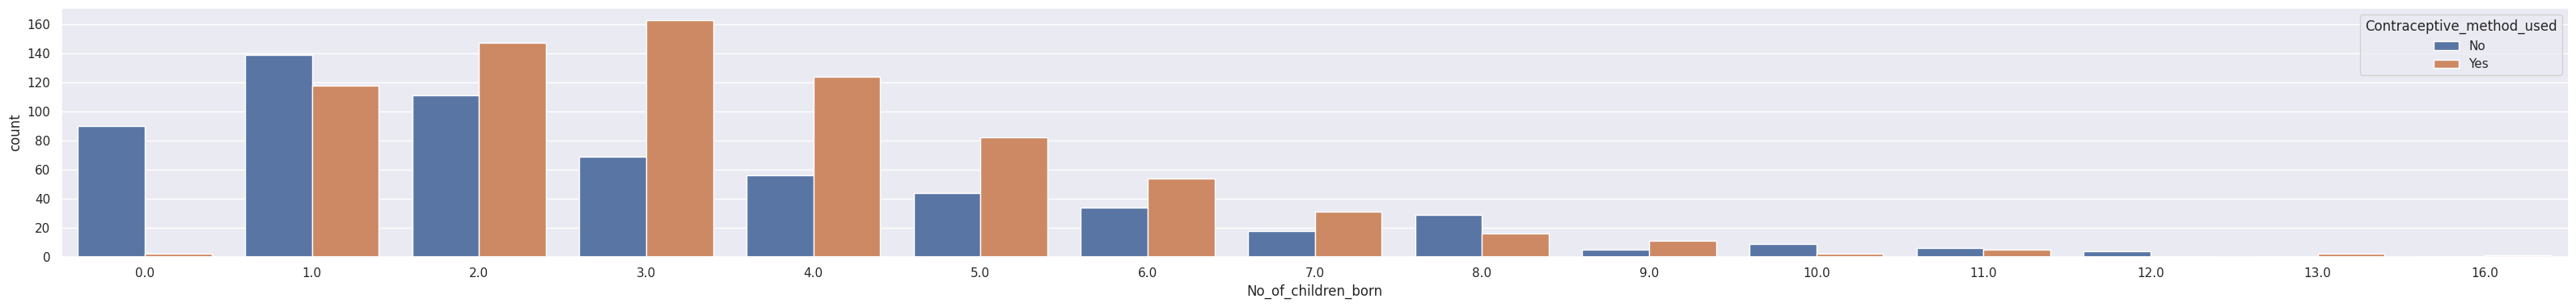

In [137]:
sb.countplot(data=df, x= df['No_of_children_born'], hue='Contraceptive_method_used');

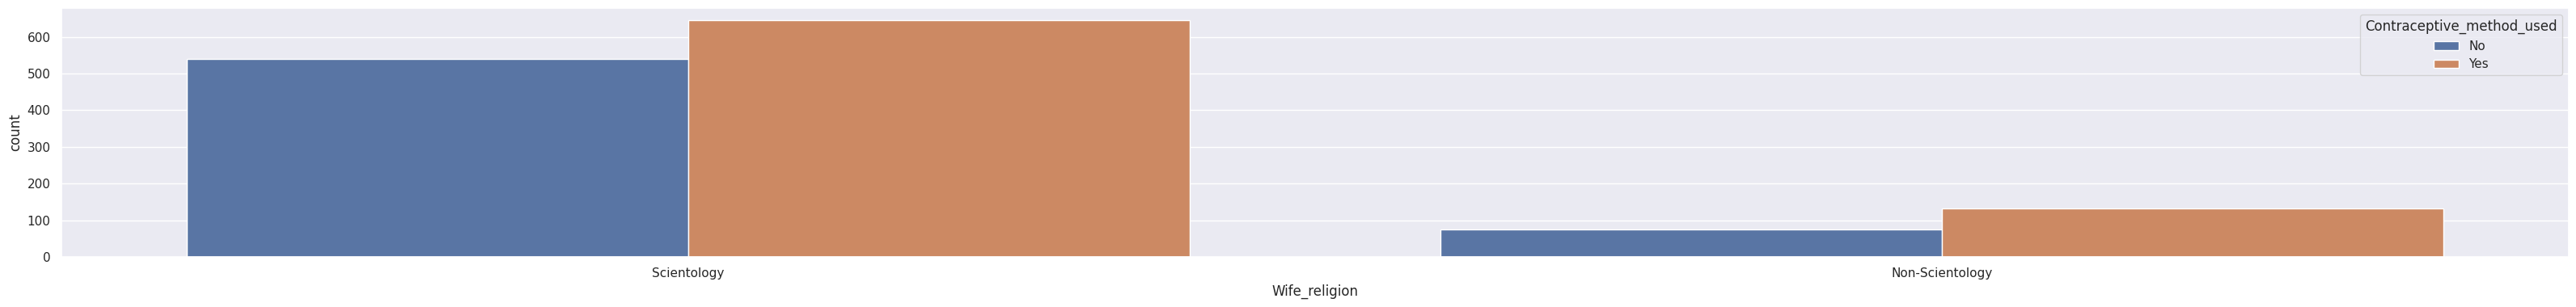

In [138]:
sb.countplot(data=df, x= df['Wife_religion'], hue='Contraceptive_method_used');

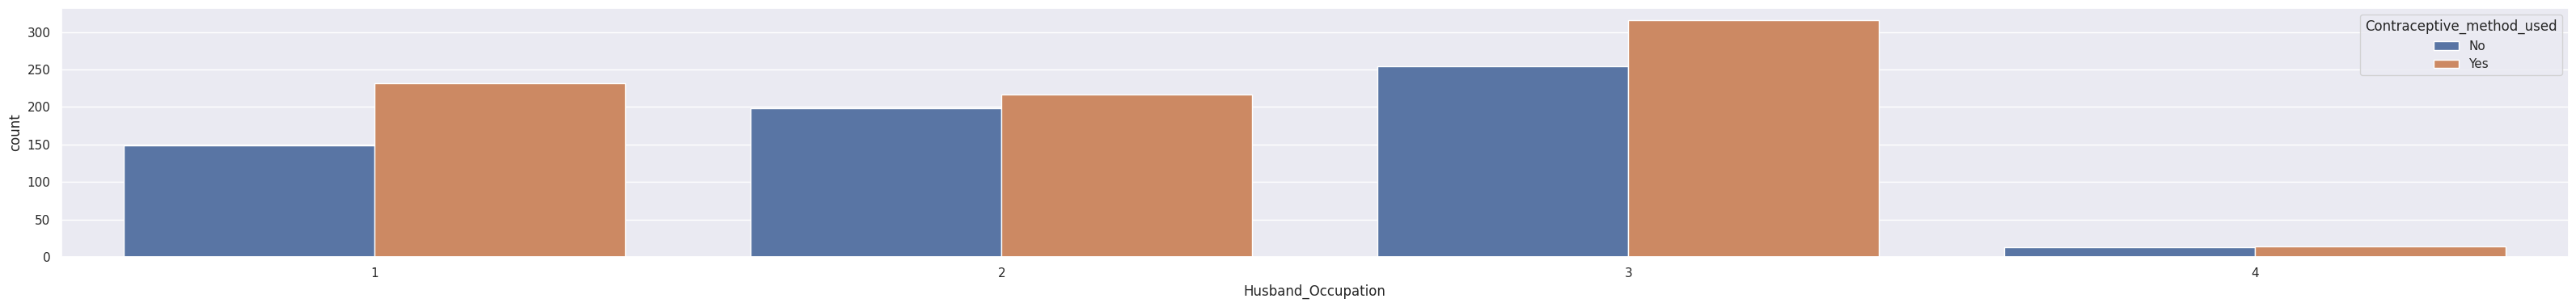

In [139]:
sb.countplot(data=df, x= df['Husband_Occupation'], hue='Contraceptive_method_used');

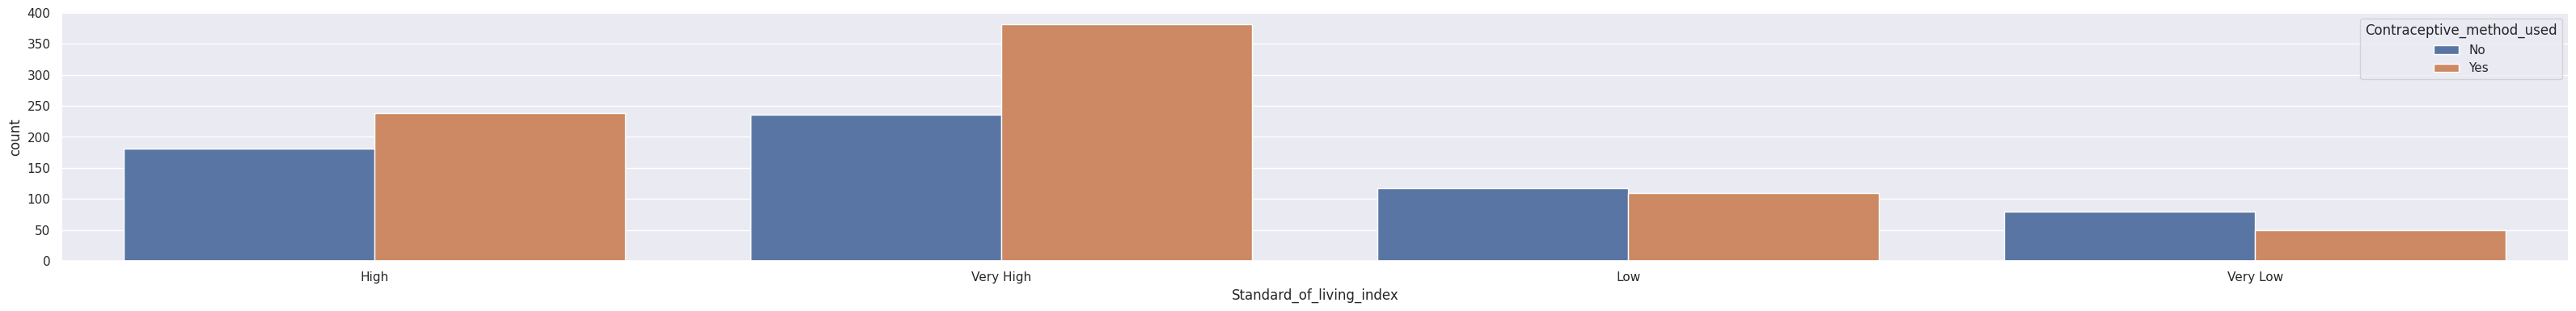

In [140]:
sb.countplot(data=df, x= df['Standard_of_living_index'], hue='Contraceptive_method_used');

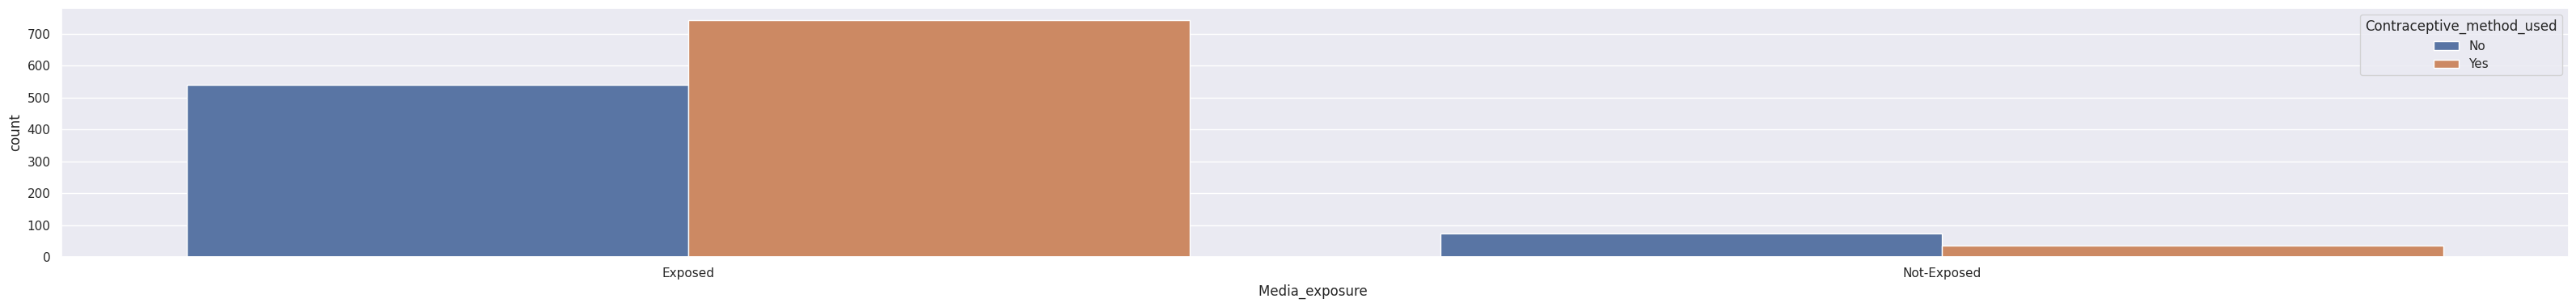

In [141]:
sb.countplot(data=df, x= df['Media_exposure '], hue='Contraceptive_method_used');

###  

**Multivariate Analysis**

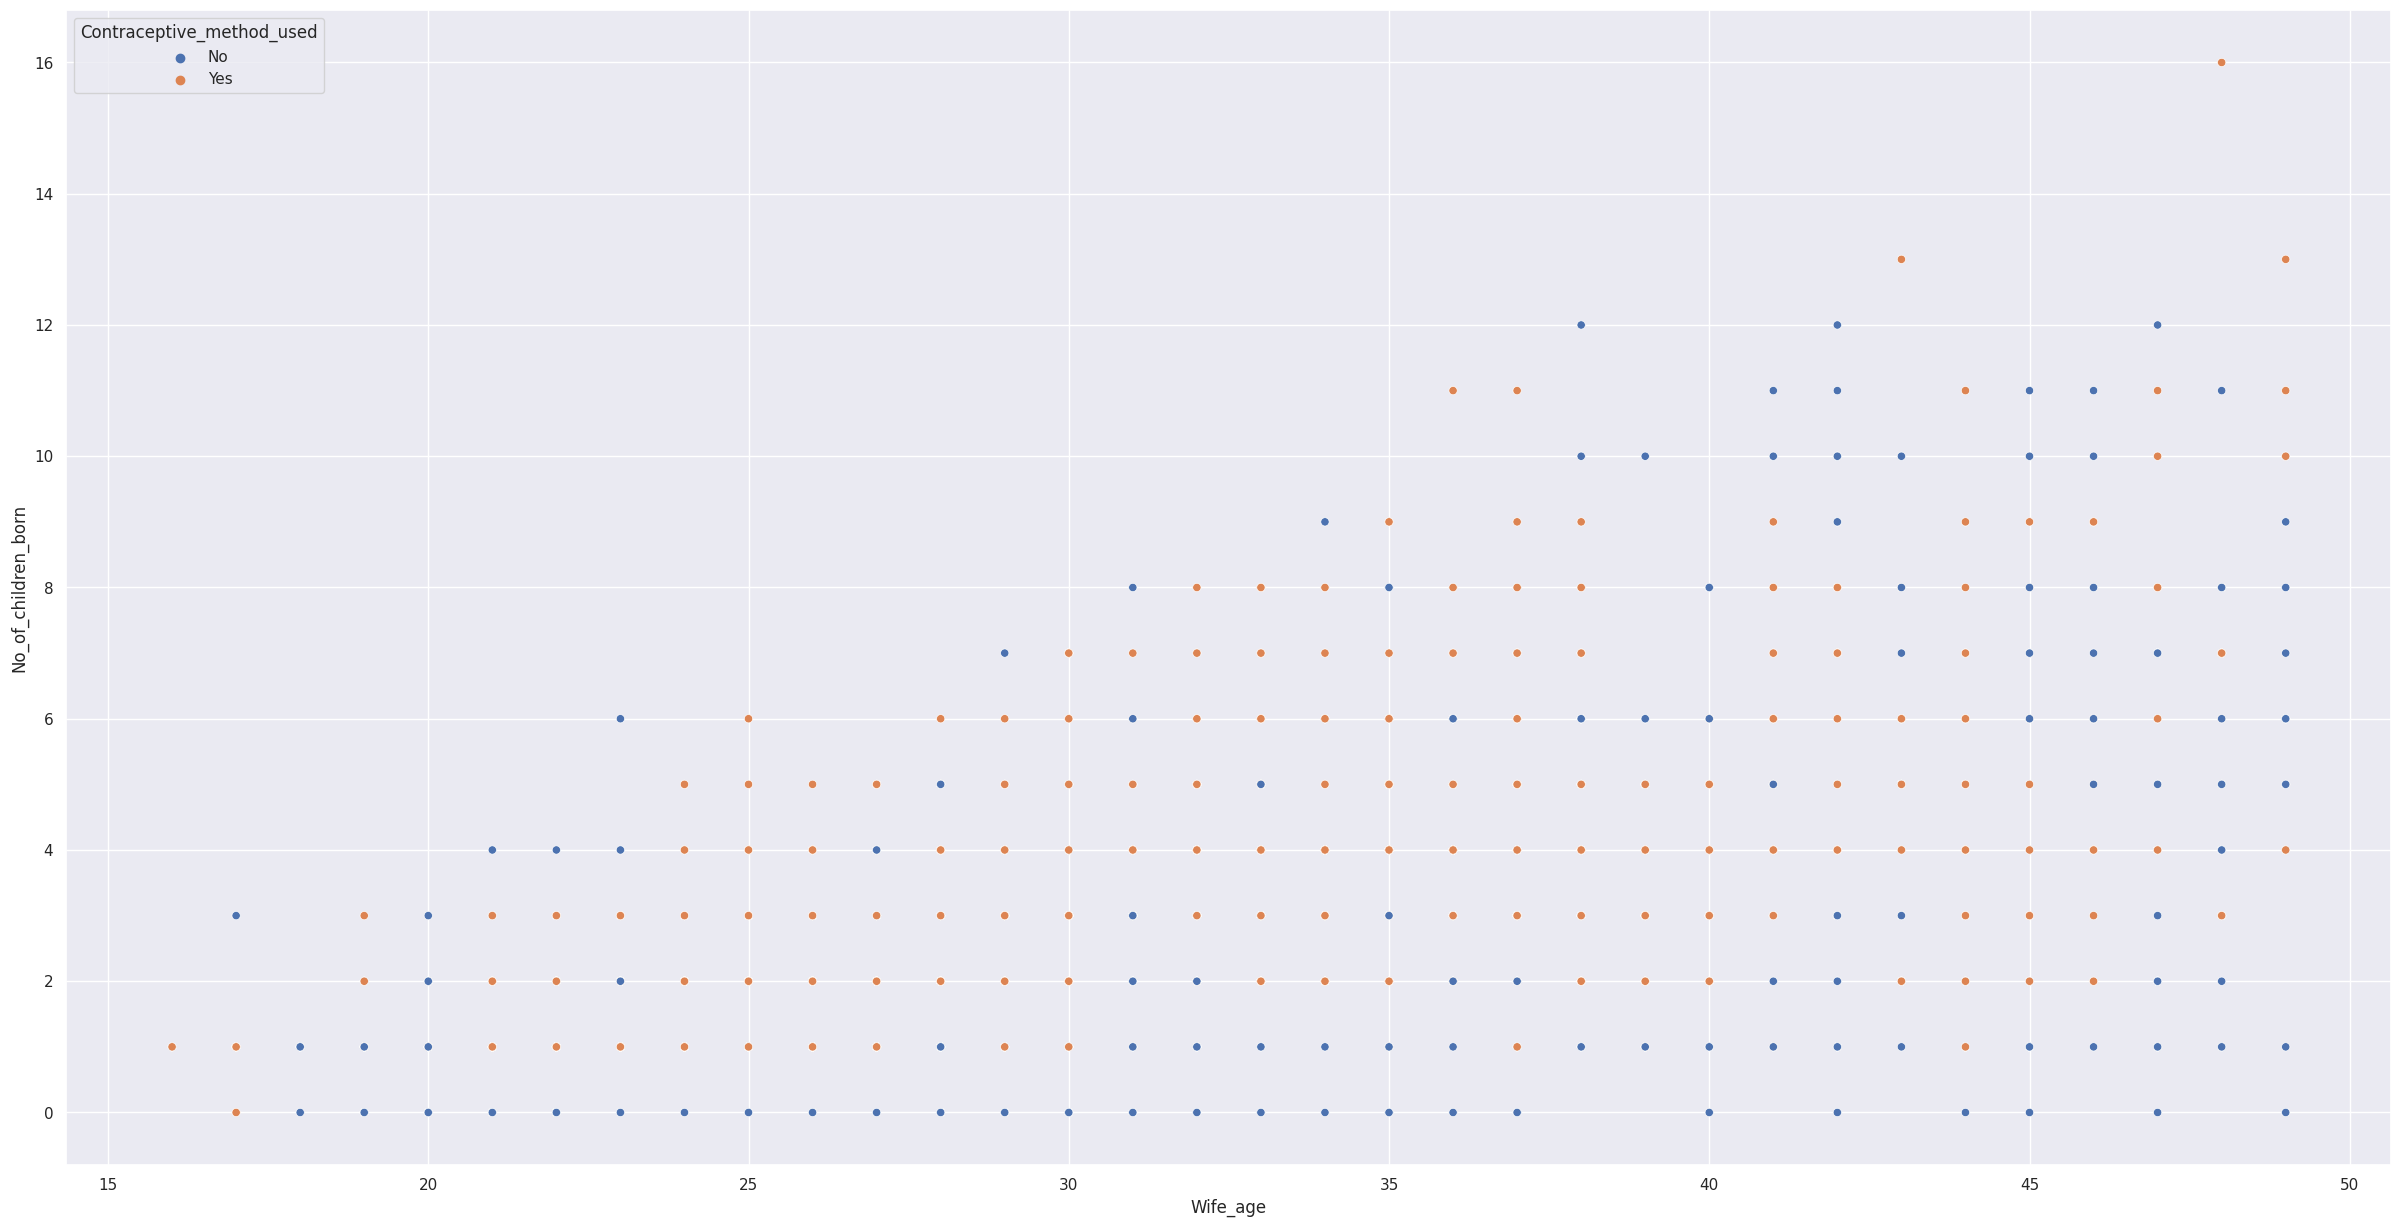

In [142]:
plt.figure(figsize=(30,15))
sb.scatterplot(data=df,x='Wife_age',y='No_of_children_born',hue='Contraceptive_method_used');


**Fixing column name formats**

In [143]:
print(df.columns)

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [144]:
df=df.rename(columns={"Wife_ education":"Wife_education","Media_exposure ":"Media_exposure"})
print(df.columns)

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')


**Null Treatment**

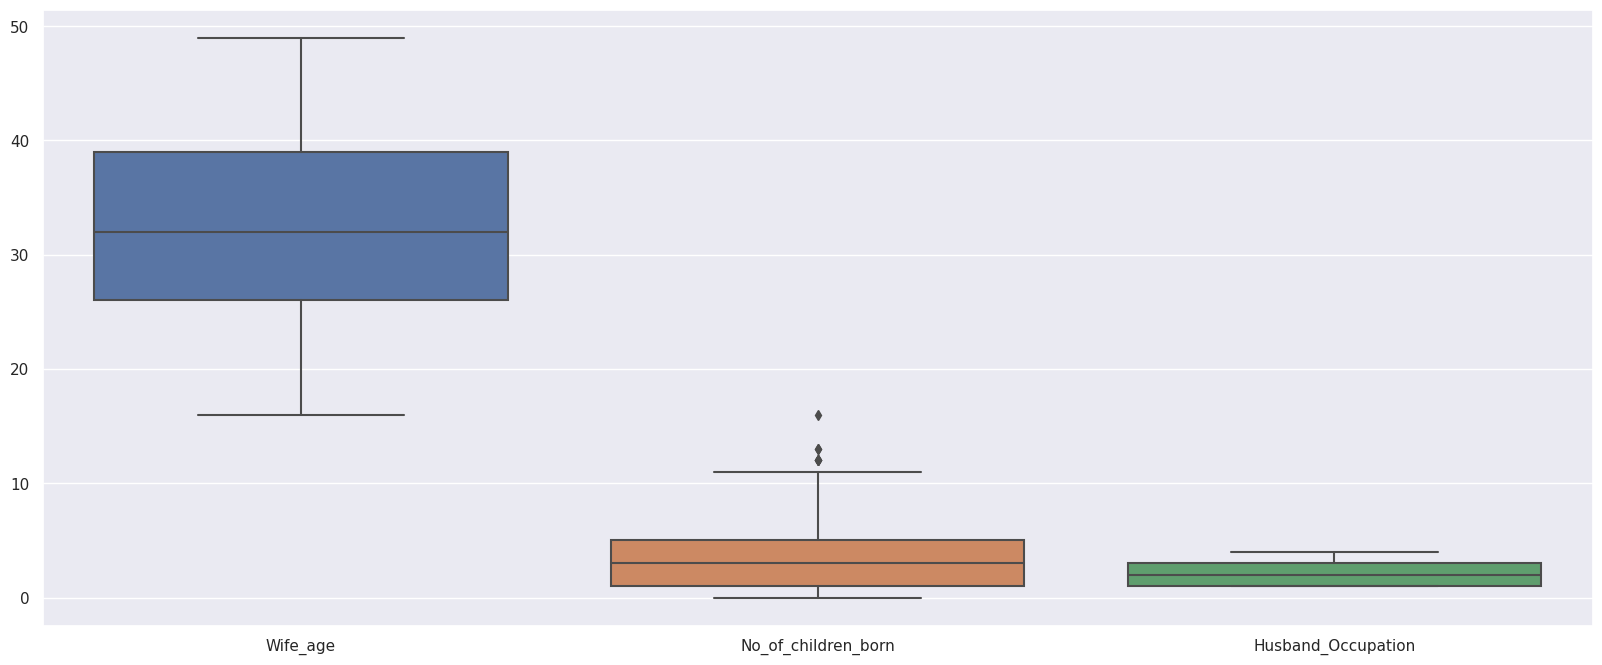

In [145]:
plt.figure(figsize=(20,8))
sb.boxplot(df);

Number of children seems to have values above 10 also, which seems incorrect.

We will impute those values with higher IQR. But before treating outliers,

we need to impute nulls with zeroes. As we cant assume any other random number of kids if not stated.


In [146]:
#Treating Null values in No_of_children_born
df['No_of_children_born']= np.where(df['No_of_children_born'].isnull(),0,df['No_of_children_born'])
df.isnull().sum()

Wife_age                     67
Wife_education                0
Husband_education             0
No_of_children_born           0
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Similary, lets impute nulls in the column Wife_age with the mean value

In [147]:
#Treating Null values in Wife_age
df['Wife_age'] = np.where(df['Wife_age'].isnull(),df['Wife_age'].mean(),df['Wife_age'])
df.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

**Outlier Treatment**

In [148]:
np.quantile(df['No_of_children_born'],0.75)


5.0

In [149]:
def remove_outlier(column):
  sorted(column)
  Q1,Q3 = np.percentile(column,[25,75])
  IQR= Q3-Q1
  lower_range = Q1-(1.5*IQR)
  upper_range = Q3+(1.5*IQR)
  return lower_range,upper_range
lr,ur = remove_outlier(df['No_of_children_born'])
df['No_of_children_born']=np.where(df['No_of_children_born']>ur,ur,df['No_of_children_born'])
df['No_of_children_born']=np.where(df['No_of_children_born']<lr,lr,df['No_of_children_born'])


In [150]:
#Child counts cant be in float, hence flooring the values

df['No_of_children_born']=np.floor(df['No_of_children_born'])

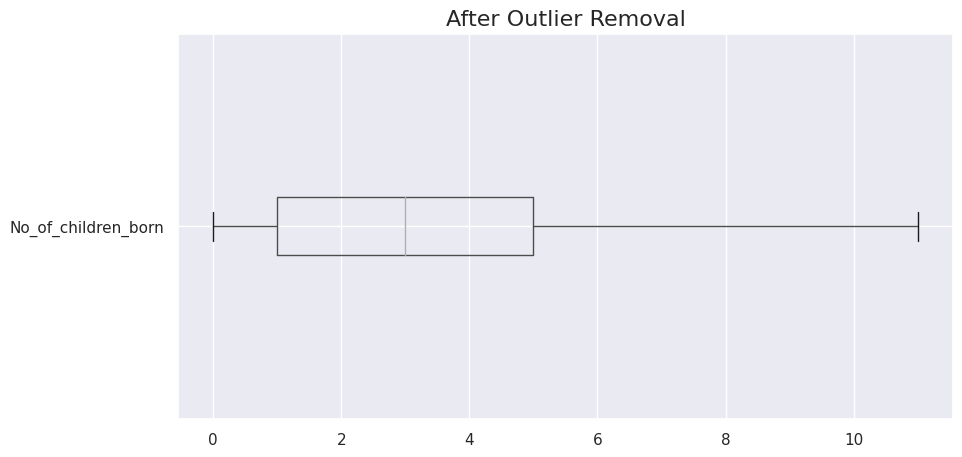

In [151]:
plt.figure(figsize=(10,5))
df[['No_of_children_born']].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

##2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [152]:
for i in df.select_dtypes(include='object').columns:
  print("Column: ",i)
  print("Number of unique values: ",df[i].nunique())
  print("Unique values: \n",df[i].value_counts())
  print("\n")


Column:  Wife_education
Number of unique values:  4
Unique values: 
 Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_education, dtype: int64


Column:  Husband_education
Number of unique values:  4
Unique values: 
 Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Column:  Wife_religion
Number of unique values:  2
Unique values: 
 Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Column:  Wife_Working
Number of unique values:  2
Unique values: 
 No     1043
Yes     350
Name: Wife_Working, dtype: int64


Column:  Standard_of_living_index
Number of unique values:  4
Unique values: 
 Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Column:  Media_exposure
Number of unique values:  2
Unique values: 
 Exposed        1284
Not-Exposed     109
Name: Media_exposure, dtype: int64


Column:  Contracepti

In [153]:
#Replacing all the above categories with values ranging from 0 to len(unique values)
decode_dict={}
for i in df.select_dtypes(include='object').columns:
  decode_dict[i]={}
  for k in range(0,df[i].nunique()):
    vtr=df[i].unique()[k]
    df[i]=np.where(df[i]==vtr, k, df[i])
    decode_dict[i][vtr]=k
  df[i]=df[i].astype('int')
print(decode_dict)


{'Wife_education': {'Primary': 0, 'Uneducated': 1, 'Secondary': 2, 'Tertiary': 3}, 'Husband_education': {'Secondary': 0, 'Primary': 1, 'Tertiary': 2, 'Uneducated': 3}, 'Wife_religion': {'Scientology': 0, 'Non-Scientology': 1}, 'Wife_Working': {'No': 0, 'Yes': 1}, 'Standard_of_living_index': {'High': 0, 'Very High': 1, 'Low': 2, 'Very Low': 3}, 'Media_exposure': {'Exposed': 0, 'Not-Exposed': 1}, 'Contraceptive_method_used': {'No': 0, 'Yes': 1}}


Now the data in all categorical columns has been decoded to integer values with above decoded dictionary.

In [154]:
df['Contraceptive_method_used'].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.0,32.557315,8.087308,16.0,26.0,32.0,38.0,49.0
Wife_education,1393.0,1.788227,1.175213,0.0,1.0,2.0,3.0,3.0
Husband_education,1393.0,1.407753,0.896351,0.0,1.0,2.0,2.0,3.0
No_of_children_born,1393.0,3.231874,2.379285,0.0,1.0,3.0,5.0,11.0
Wife_religion,1393.0,0.148600,0.355822,0.0,0.0,0.0,0.0,1.0
Wife_Working,1393.0,0.251256,0.433891,0.0,0.0,0.0,1.0,1.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393.0,1.047380,0.912427,0.0,0.0,1.0,2.0,3.0
Media_exposure,1393.0,0.078248,0.268658,0.0,0.0,0.0,0.0,1.0
Contraceptive_method_used,1393.0,0.559225,0.496658,0.0,0.0,1.0,1.0,1.0


In [155]:
# df=df_copy.copy(deep=True)
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_education             1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


**Test Train split**

In [157]:
x= df.drop('Contraceptive_method_used',axis=1)
y= df.pop('Contraceptive_method_used')

In [158]:
x.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure'],
      dtype='object')

In [160]:
y.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472],
           dtype='int64', length=1393)

In [161]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=123,stratify=y)
print("Shape of training dataset(x_train): ",x_train.shape)
print("Shape of testing dataset(x_test): ",x_test.shape)
print("Shape of target training dataset(y_train): ",y_train.shape)
print("Shape of target testing dataset(y_test): ",y_test.shape)

Shape of training dataset(x_train):  (975, 9)
Shape of testing dataset(x_test):  (418, 9)
Shape of target training dataset(y_train):  (975,)
Shape of target testing dataset(y_test):  (418,)


###**Building Logistic Regression(LR) Model**

In [162]:
LR_model = LogisticRegression(solver='liblinear',max_iter=10000)
#LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(x_train,y_train)

#Predicting target varaible using Logistic Regression Model
y_train_predict_from_LR = LR_model.predict(x_train)
y_test_predict_from_LR = LR_model.predict(x_test)

LR_model_score_train_data = LR_model.score(x_train,y_train)
LR_model_score_test_data = LR_model.score(x_test,y_test)

print("LR_model_score_train_data --> ",LR_model_score_train_data)
print("LR_model_score_test_data --> ",LR_model_score_test_data)

LR_model_score_train_data -->  0.6564102564102564
LR_model_score_test_data -->  0.631578947368421


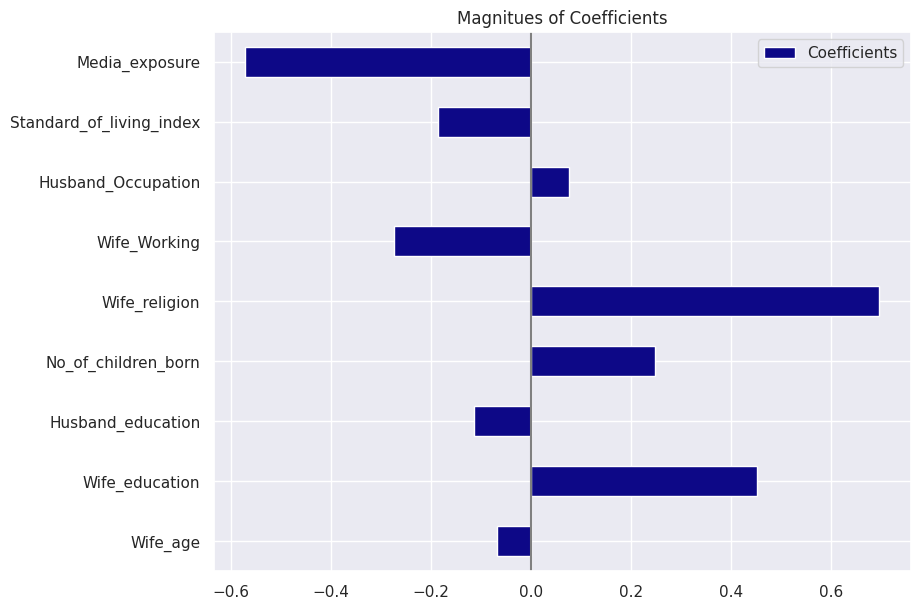

In [163]:
LR_model.coef_

coefs = pd.DataFrame(
    LR_model.coef_.reshape(-1,1), columns=["Coefficients"], index=x_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7),colormap='plasma')
plt.title("Magnitues of Coefficients")
plt.axvline(x=0, color=".5")

###**Building LDA Model**

In [164]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train,y_train)

#Predicting target varaible using Linear Discrimant Analysis
y_train_predict_from_LDA = LDA_model.predict(x_train)
y_test_predict_from_LDA = LDA_model.predict(x_test)


LDA_model_score_train_data = LDA_model.score(x_train,y_train)
LDA_model_score_test_data = LDA_model.score(x_test,y_test)


print("LDA_model_score_train_data --> ",LDA_model_score_train_data)
print("LDA_model_score_test_data --> ",LDA_model_score_test_data)

LDA_model_score_train_data -->  0.6564102564102564
LDA_model_score_test_data -->  0.6196172248803827


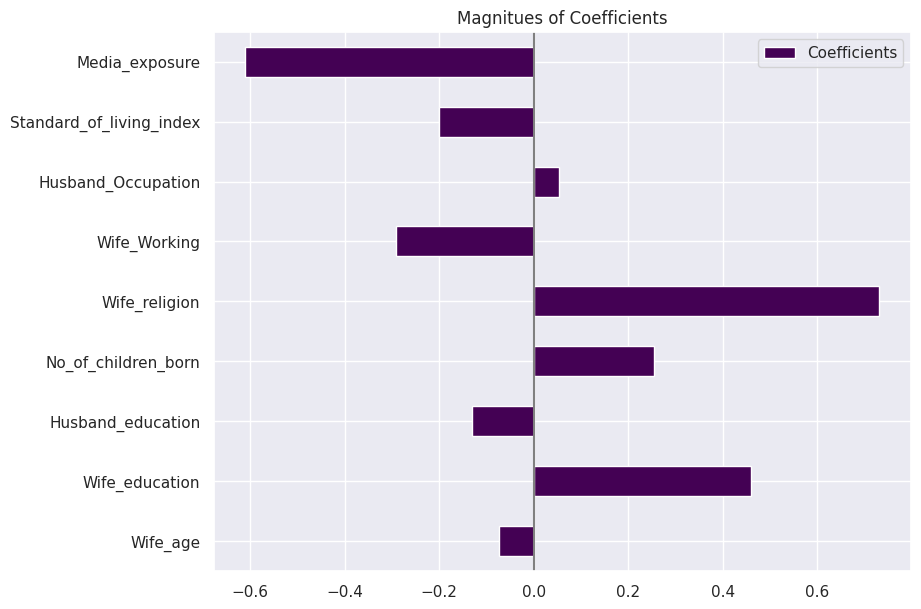

In [165]:


coefs = pd.DataFrame(
    LDA_model.coef_.reshape(-1,1), columns=["Coefficients"], index=x_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7),colormap='viridis')
plt.title("Magnitues of Coefficients")
plt.axvline(x=0, color=".5")

###**Building CART Model**

In [166]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='auto', min_samples_leaf=5,
                       random_state=1024)


In [167]:
CART_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='auto', min_samples_leaf=5,
                       random_state=1024)
CART_model.fit(x_train,y_train)

#Predicting target varaible using Classification and Regression Tree model
y_train_predict_from_CART = CART_model.predict(x_train)
y_test_predict_from_CART = CART_model.predict(x_test)


CART_model_score_train_data = CART_model.score(x_train,y_train)
CART_model_score_test_data = CART_model.score(x_test,y_test)


print("CART_model_score_train_data --> ",CART_model_score_train_data)
print("CART_model_score_test_data --> ",CART_model_score_test_data)

CART_model_score_train_data -->  0.6502564102564102
CART_model_score_test_data -->  0.631578947368421


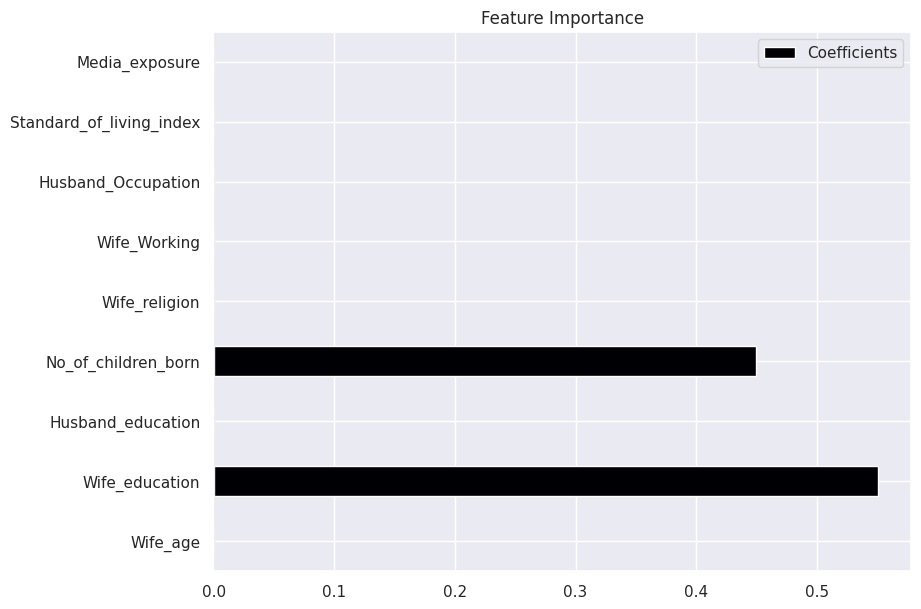

In [230]:
CART_model.feature_importances_

coefs = pd.DataFrame(
    CART_model.feature_importances_.reshape(-1,1), columns=["Coefficients"], index=x_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7),colormap='inferno')
plt.title("Feature Importance")
plt.axvline(x=0, color=".5")

In [170]:
from sklearn import tree
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(CART_model, out_file= ld_tree_regularized , feature_names = list(x_train))

ld_tree_regularized.close()

##2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

###Performance Metrics of Logistic Regression Model

Logistic Regression: AUC and ROC for the training data

AUC: 0.697


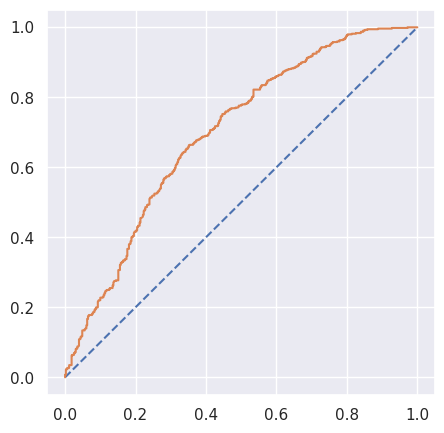

In [194]:
#predict probabilities
lr_probs = LR_model.predict_proba(x_train)
#Keeping probabilities for positive outcome only
lr_probs = lr_probs[:,1]
#Calculate Area under curve
auc=roc_auc_score(y_train,lr_probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, lr_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

Logistic Regression: AUC and ROC for the testing data

AUC: 0.659


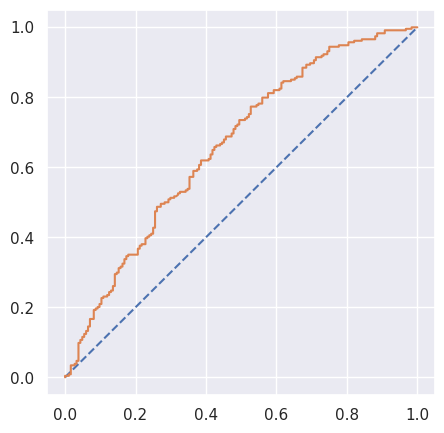

In [195]:
#predict probabilities
lr_probs = LR_model.predict_proba(x_test)
#Keeping probabilities for positive outcome only
lr_probs = lr_probs[:,1:]
#Calculate Area under curve
auc=roc_auc_score(y_test,lr_probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Logistic Regression : Confusion Matrix and Classification Report for training Data**

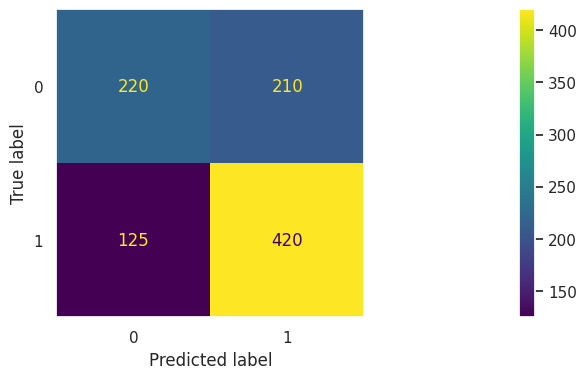

              precision    recall  f1-score   support

           0       0.64      0.51      0.57       430
           1       0.67      0.77      0.71       545

    accuracy                           0.66       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.65      0.66      0.65       975



In [196]:
cm = confusion_matrix(y_train,y_train_predict_from_LR,labels=LR_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LR_model.classes_)
disp.plot()
plt.grid(False)
plt.show();
print(classification_report(y_train,y_train_predict_from_LR))

**Logistic Regression : Confusion Matrix and classification report
for testing Data**

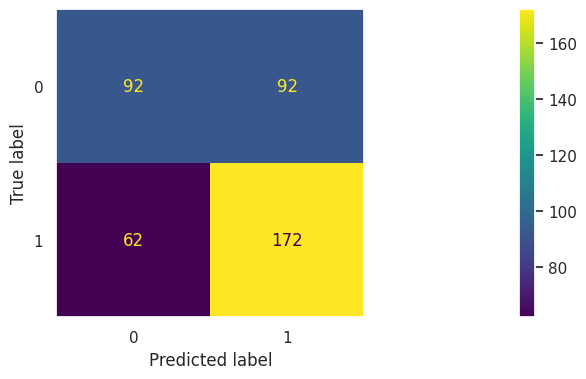

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       184
           1       0.65      0.74      0.69       234

    accuracy                           0.63       418
   macro avg       0.62      0.62      0.62       418
weighted avg       0.63      0.63      0.63       418



In [197]:
cm = confusion_matrix(y_test,y_test_predict_from_LR,labels=LR_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LR_model.classes_)
disp.plot()
plt.grid(False)
plt.show();
print(classification_report(y_test,y_test_predict_from_LR))

###Performance Metrics of Linear Discriminant Analysis Model

Linear Discriminant Analysis: AUC and ROC for the training data

AUC LDA: 0.696


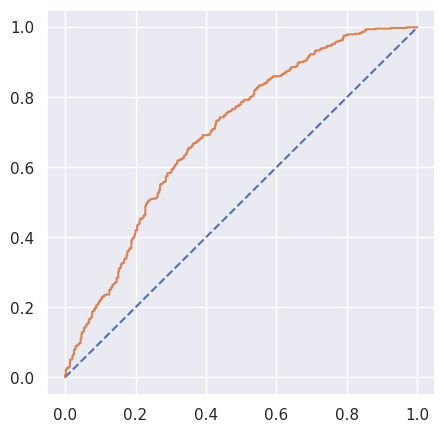

In [200]:
#Predict probabilities
LDA_probs = LDA_model.predict_proba(x_train)
#Keeping probabilities for positive outcome only
LDA_probs = LDA_probs[:,1:]
#Calculate Area under curve
auc_LDA = roc_auc_score(y_train,LDA_probs)
print('AUC LDA: %.3f' % auc_LDA)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, LDA_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

Linear Discriminant Analysis: AUC and ROC for the testing data

AUC LDA: 0.658


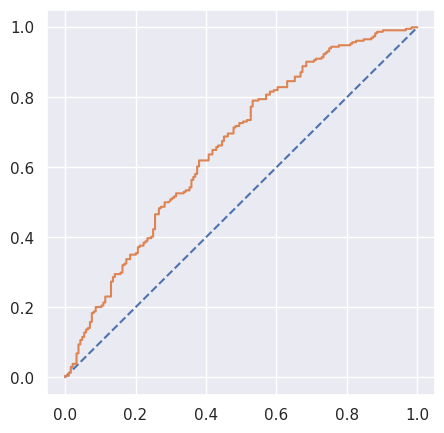

In [201]:
#Predict probabilities
LDA_probs = LDA_model.predict_proba(x_test)
#Keeping probabilities for positive outcome only
LDA_probs = LDA_probs[:,1:]
#Calculate Area under curve
auc_LDA = roc_auc_score(y_test,LDA_probs)
print('AUC LDA: %.3f' % auc_LDA)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, LDA_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Linear Discriminant Analysis : Confusion Matrix and Classification Report for training Data**

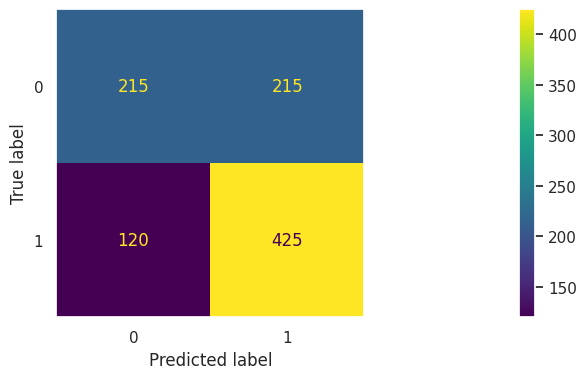

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       430
           1       0.66      0.78      0.72       545

    accuracy                           0.66       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.65      0.66      0.65       975



In [202]:
cm = confusion_matrix(y_train,y_train_predict_from_LDA,labels=LDA_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LDA_model.classes_)
disp.plot()
plt.grid(False)
plt.show();
print(classification_report(y_train,y_train_predict_from_LDA))

**Linear Discriminant Analysis : Confusion Matrix and Classification Report for testing Data**

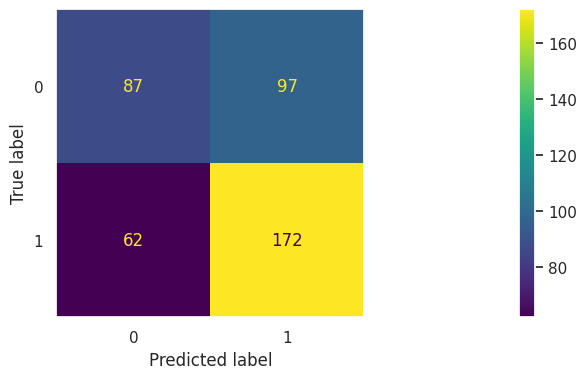

              precision    recall  f1-score   support

           0       0.58      0.47      0.52       184
           1       0.64      0.74      0.68       234

    accuracy                           0.62       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.62      0.61       418



In [203]:
cm = confusion_matrix(y_test,y_test_predict_from_LDA,labels=LDA_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LDA_model.classes_)
disp.plot()
plt.grid(False)
plt.show();
print(classification_report(y_test,y_test_predict_from_LDA))

###Performance Metrics of CART Model

Classification and Regression Tree : AUC and ROC for the training data

AUC CART: 0.650


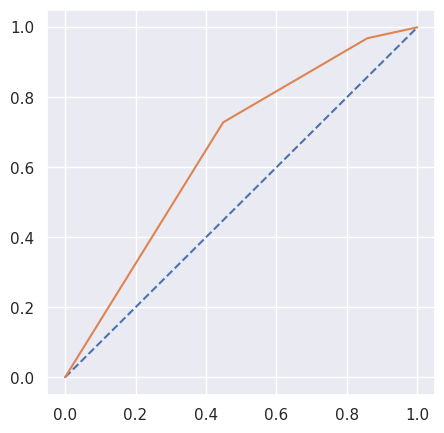

In [204]:
#Predict probabilities
CART_probs = CART_model.predict_proba(x_train)
#Keeping probabilities for positive outcome only
CART_probs = CART_probs[:,1:]
#Calculate Area under curve
auc_LDA = roc_auc_score(y_train,CART_probs)
print('AUC CART: %.3f' % auc_LDA)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, CART_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

Classification and Regression Tree : AUC and ROC for the testing data

AUC CART: 0.637


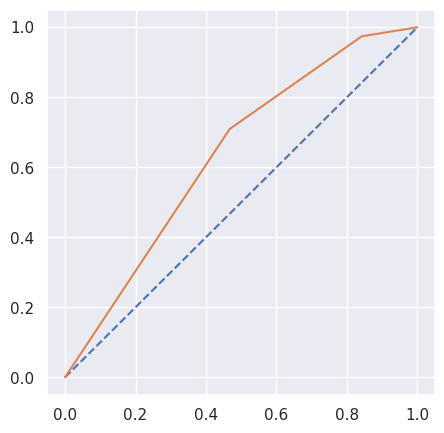

In [205]:
#Predict probabilities
CART_probs = CART_model.predict_proba(x_test)
#Keeping probabilities for positive outcome only
CART_probs = CART_probs[:,1:]
#Calculate Area under curve
auc_LDA = roc_auc_score(y_test,CART_probs)
print('AUC CART: %.3f' % auc_LDA)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, CART_probs)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**CART : Confusion Matrix and Classification Report for training Data**

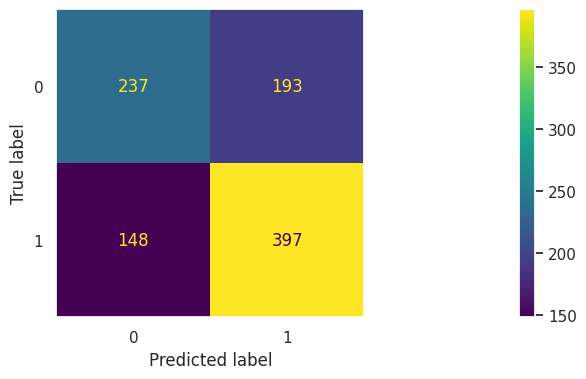

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       430
           1       0.67      0.73      0.70       545

    accuracy                           0.65       975
   macro avg       0.64      0.64      0.64       975
weighted avg       0.65      0.65      0.65       975



In [206]:
cm = confusion_matrix(y_train,y_train_predict_from_CART, labels=CART_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=CART_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(classification_report(y_train,y_train_predict_from_CART))

**CART : Confusion Matrix and Classification Report for testing Data**

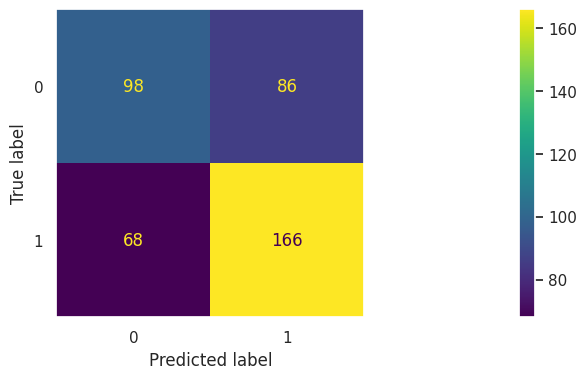

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       184
           1       0.66      0.71      0.68       234

    accuracy                           0.63       418
   macro avg       0.62      0.62      0.62       418
weighted avg       0.63      0.63      0.63       418



In [207]:
cm = confusion_matrix(y_test,y_test_predict_from_CART, labels=CART_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=CART_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(classification_report(y_test,y_test_predict_from_CART))

###Model Comparision

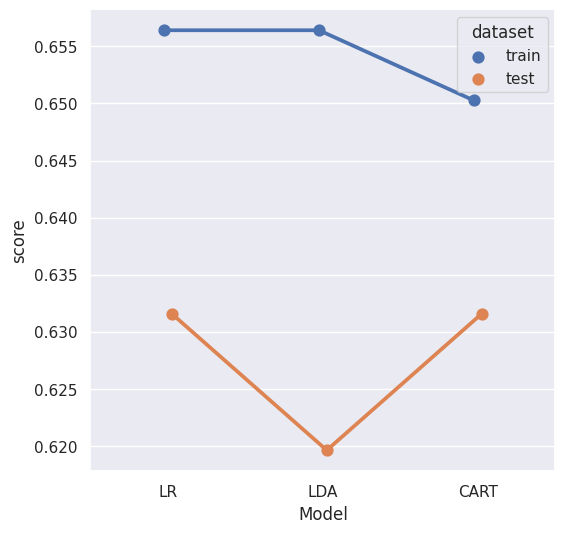

In [208]:
model_perf = pd.DataFrame({'Model':['LR','LDA','CART','LR','LDA','CART'],
             'score':[LR_model_score_train_data,LDA_model_score_train_data,CART_model_score_train_data,LR_model_score_test_data,LDA_model_score_test_data,CART_model_score_test_data],
             'dataset':['train','train','train','test','test','test']}
             )
model_perf
plt.figure(figsize=(6,6))
sb.pointplot(data=model_perf, x='Model',y='score',hue='dataset',dodge=True);

##2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

***Inferences- from Logistic Regression Model :***

Contraceptive method used : 0 indicates No, 1 indicated Yes

For predicting that person do not use contraceptive method (Label-0 ):

Precision (60%) – 60% of females predicted are not using contraceptives out of all females that were predicted as not using contraceptives.</b>

Recall (50%) – Out of all the females who didnt take contraceptives, 50% of females have been predicted correctly .</b>

For predicting that a person takes cotraceptive(Label-1 ):

Precision (65%) – Of all the females predicted to use contraceptives, 65% of females actually use contraceptives.</b>

Recall (74%) – Out of all the females actually taking contraceptives , 74% of females have been predicted correctly .</b>

In [223]:
linear_equation_LR = str(LR_model.intercept_[0])
for i in range(len(x_train.columns)):
  linear_equation_LR = linear_equation_LR + " + "+LR_model.feature_names_in_[i]+"*("+str(LR_model.coef_[0][i].round(3))+")"
print(linear_equation_LR)


1.0382665707379948 + Wife_age*(-0.068) + Wife_education*(0.452) + Husband_education*(-0.114) + No_of_children_born*(0.248) + Wife_religion*(0.697) + Wife_Working*(-0.273) + Husband_Occupation*(0.076) + Standard_of_living_index*(-0.185) + Media_exposure*(-0.571)


***Inferences- from Linear Discriminant Analsyis(LDA) :***

Contraceptive method used : 0 indicates No, 1 indicated Yes

For predicting that person do not use contraceptive method (Label-0 ):

Precision (58%) – 58% of females predicted are not using contraceptives out of all females that were predicted as not using contraceptives.</b>

Recall (47%) – Out of all the females who didnt take contraceptives, 47% of females have been predicted correctly .</b>

For predicting that a person takes cotraceptive(Label-1 ):

Precision (64%) – Of all the females predicted to use contraceptives, 64% of females actually use contraceptives.</b>

Recall (74%) – Out of all the females actually taking contraceptives , 74% of females have been predicted correctly .</b>

In [227]:
linear_equation_LDA = str(LDA_model.intercept_[0].round(2))
for i in range(len(x_train.columns)):
  linear_equation_LDA = linear_equation_LDA + " + "+LDA_model.feature_names_in_[i]+"*("+str(LDA_model.coef_[0][i].round(3))+")"
print(linear_equation_LDA)


1.26 + Wife_age*(-0.072) + Wife_education*(0.461) + Husband_education*(-0.13) + No_of_children_born*(0.254) + Wife_religion*(0.732) + Wife_Working*(-0.291) + Husband_Occupation*(0.053) + Standard_of_living_index*(-0.201) + Media_exposure*(-0.61)


***Inferences- from CART Model :***

Contraceptive method used : 0 indicates No, 1 indicated Yes

For predicting that person do not use contraceptive method (Label-0 ):

Precision (59%) – 59% of females predicted are not using contraceptives out of all females that were predicted as not using contraceptives.</b>

Recall (53%) – Out of all the females who didnt take contraceptives, 53% of females have been predicted correctly .</b>

For predicting that a person takes cotraceptive(Label-1 ):

Precision (66%) – Of all the females predicted to use contraceptives, 66% of females actually use contraceptives.</b>

Recall (71%) – Out of all the females actually taking contraceptives , 71% of females have been predicted correctly .</b>

In [238]:
print(CART_model.feature_importances_)
print(CART_model.feature_names_in_)



[0.         0.55045807 0.         0.44954193 0.         0.
 0.         0.         0.        ]
['Wife_age' 'Wife_education' 'Husband_education' 'No_of_children_born'
 'Wife_religion' 'Wife_Working' 'Husband_Occupation'
 'Standard_of_living_index' 'Media_exposure']
